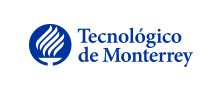

<h1><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Second Partial Evaluation</center></h3>
    
<h3><center>Date: November 3, 2021</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Name: Juan Sebastián Rodríguez Galarza</h4>
<h4>https://github.com/SebasRod23</h4>
<h4>Student ID: A01656159</h4>
<br>
<h4>Name: Kevin Torres Martínez</h4>
<h4>https://github.com/KevinTMtz</h4>
<h4>Student ID: A01656257</h4>
<br>
<h4>Name: Aldo Fernando Ortiz Mejía</h4>
<h4>https://github.com/kilodecarnitas</h4>
<h4>Student ID: A01654725</h4>
<br>
<h4>Name: Gerardo Arturo Miranda Godoy</h4>
<h4>https://github.com/garturom</h4>
<h4>Student ID: A01338074</h4>

$$Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.$$

# Examen Parcial 2 - Aprendizaje Máquina

---

Inidicaciones: El examen consta de ejercicios prácticos, los cuales se abordan lo visto en los temas 3 y 4.

Se evalua el desarrollo adecuado de la metodología para el ajuste de los datos, el modelo y la precisión del mismo.

* Fecha de liberación del examen: Viernes 22 de octubre.

* Fecha límite de entrega: Martes 2 de noviembre hasta las 23:59 hrs

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.

En caso de no tener la información aquí solicitada, no se evaluará el examen.

---
# Sección 1

### Ingeniería de Características

---

Tomando como referencia la información en la notebook <font color=red>"Feature_Engineering"</font>, deberán utilizar los archivos de <font color=blue>"train.csv"</font> y <font color=green>"test.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento, que es la ingeniería de características, donde a partir del análisis estadístico preliminar, podríamos sustituir, ajustar, imputar datos o crear nuevas variables con fines prácticos.

----

Idea: Aplicar su propio pipeline para replicar o mejorar los resultados de predicción de los diversos algoritmos puestos en dicha notebook. Pueden enfocarse solamente en los primeros 5 algoritmos que tuvieron un desempeño mayor al 79% en este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron, así como el porqué es conveniente (o no) aplicar validación cruzada (CV) y gridsearch.

In [ ]:
#Importación de algortimos con accuracy mayor al 79%
#Importación de librerías para manejo de datos
import pandas as pd
import numpy as np
import random as rnd

#Importación de librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importación de algoritmos ML, únicamente los de >79%
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#Carga de datos y unión de ambos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [ ]:
#Observamos estructura de data.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clasificación
### Preguntas de Análisis

* ¿Qué características están disponibles en el conjunto de datos?
            Contamos con id de pasajero, si sobrevivió o no, clase, nombre, sexo, año, ticked, cuera, cabina, embarcamiento, etc.
* ¿Qué variables son categóricas?
            Survived, Pclass, Sex, SibSp, Embarked
* ¿Hay variables numéricas?
            Sí tenemos el id, la edad y la cuera
* ¿Qué variables tienen tipos de datos mezclados? (numérico, alfanumérico, etc...)
            Contamos con las variables de nombre, ticket y cabinas

# Correlación.

#### Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado.

Para realizar el análisis de correlación nos basaremos en el trabajo previo ya realizado, para esto haremos pivoteo con variables de dataset.

### Pivotéo con PClass, establece la clase en la que se iba viajando

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Se puede observar que existe una relación de Pclass con el índice se supervicencia, decrece con el aumento del nivel de Pclass.

### Pivotéo con Sex, establece la el sexo de los pasajeros

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Se puede observar que existe una relación del sexo con el índice se supervicencia, decrece la probabilidad de supervivencia si eres hombre.

### Las variables Sibling per Person (SibSp), Parch y demás no parecen demostrar una relación debido a eso no son mencionadas. 

## Análisis Visual

### Edad vs Supervivencia

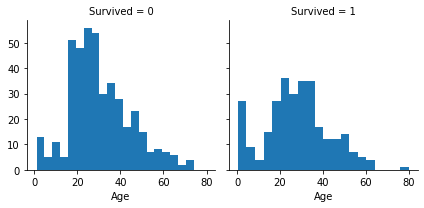

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Se puede mostrar un mayor índice de supervivencia en personas menores a los 10 años y personas entre 20 y 40 años, que ya podemos ir pensando que la mayoría son mujeres

# Convirtiendo y Completando

### Limpieza de Variables

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creando categorización por prefijo de nombre

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Adicionando categorización al dataset

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## Eliminación de nombres y únicamente nos quedamos con sus prefijos, ya que los nombres son insignificantes, columna Title

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


### Cambiando sexo a categorización numérica para mejor implementación en algoritmos de ML

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Creación de intervalos de categorización para las edades.

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sexo (0 o 1) y Pclass (1, 2, 3) para calcular los valores de Edad para las seis combinaciones.

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


## Asignación de valores clasificatorios por intervalos de edades al data frame.

In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


## En conjunto

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Añadimos columna del tamaño de la familia del individuo

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### Añadimos columna en el caso de que iba sólo en el titanic

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Observamos en primera instancia una posible relación, sin embargo, no es confirmable, pero hubo un mayor índice en los que iban solos

### Añadimos Columnas al main dts

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Creamos relación en de clase con edad

In [ ]:
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1,1
1,893,3,1,2,7.0000,S,3,0
2,894,2,0,3,9.6875,Q,1,1
3,895,3,0,1,8.6625,S,1,1
4,896,3,1,1,12.2875,S,3,0


In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Resolución de vacíos, NA's, Variables categóricas sin enumeramiento y demás.

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


## Conversión de intervalos y unión de columnas creadas

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


## Verificamos Dataset

In [ ]:
train_df.isna()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [ ]:
train_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## Tenemos listo el dataset para la implementación de los algoritmos de ML, dado que el ejercicio es la implementación con CV y GridSearch, se procede a la implementación de estos con los algoritmos asignados con accuracy mayor al 79%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = train_df.drop(train_df.columns[0], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [ ]:
X

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...
886,2,0,1,1,0,5,1,2
887,1,1,1,2,0,2,1,1
888,3,1,1,2,0,2,0,3
889,1,0,1,2,1,1,1,1


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
## Realizamos la importación de make_pipeline para crear un pipelina con los modelosdeseados se sklearn, utilizaremos robust scaler para
## normalización, ya que ya tenemos nuestro df limpio y con puros datos numéricos.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler



In [ ]:
#Creación de pipelines con los 5 mejores modelos seleccionados

In [ ]:
pipeline_logistic_regression = make_pipeline(\
                         RobustScaler(),
                         LogisticRegression(solver='liblinear'))


In [ ]:
pipeline_svc = make_pipeline(\
                         RobustScaler(),
                         SVC())

In [ ]:
pipeline_random_forest = make_pipeline(\
                         RobustScaler(),
                         RandomForestClassifier(n_estimators=10, max_depth=3, random_state=10))

In [ ]:
pipeline_k_neighbors = make_pipeline(\
                         RobustScaler(),
                         KNeighborsClassifier())

In [ ]:
pipeline_decision_tree = make_pipeline(\
                         RobustScaler(),DecisionTreeClassifier())

In [ ]:
pipeline = make_pipeline(\
                         RobustScaler(),
                         LogisticRegression(solver='liblinear'))

In [ ]:
pipeline = make_pipeline(\
                         RobustScaler(),
                         LogisticRegression(solver='liblinear'))

## CrossValidation con KfoldShuffle

In [ ]:
#CrossValidation con LogisticRegression
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_logistic_regression.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_logistic_regression.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_logistic_regression.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df


,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.808989,0.826816
1,0.807854,0.769663
2,0.809257,0.808989
3,0.788219,0.814607
4,0.806452,0.792135


In [ ]:
#CrossValidation con SVC
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_svc.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_svc.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_svc.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.785112,0.787709
1,0.788219,0.764045
2,0.784011,0.780899
3,0.771388,0.825843
4,0.792426,0.741573


In [ ]:
#CrossValidation con Random Forest
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_random_forest.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_random_forest.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_random_forest.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.799157,0.798883
1,0.800842,0.730337
2,0.791024,0.814607
3,0.785414,0.820225
4,0.800842,0.792135


In [ ]:
#CrossValidation con KNeighbors
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_k_neighbors.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_k_neighbors.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_k_neighbors.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.834270,0.804469
1,0.861150,0.775281
2,0.837307,0.786517
3,0.824684,0.853933
4,0.856942,0.786517


In [ ]:
#CrossValidation con Decision Tree
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
accuracy_df = pd.DataFrame()
for train_index, test_index in folds.split(train_df):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    pipeline_decision_tree.fit(X_train, y_train)
    df = {'Exactitud en Entrenamiento':accuracy_score(y_train, pipeline_decision_tree.predict(X_train)), 
          'Exactitud en Testeo':accuracy_score(y_test, pipeline_decision_tree.predict(X_test))}
    accuracy_df=accuracy_df.append(df, ignore_index = True)
    
accuracy_df

,Exactitud en Entrenamiento,Exactitud en Testeo
0,0.866573,0.815642
1,0.877980,0.775281
2,0.872370,0.831461
3,0.861150,0.865169
4,0.880785,0.758427


# Grid Search

In [ ]:
## Grid Search con Logistic Regression
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(max_iter=100))
param_grid = {
    'selectkbest__k': [i+1 for i in range(8)],
    'logisticregression__class_weight': [None,'balanced'],
    'logisticregression__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=100
                                                   )

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)



Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross Validation Score: 0.8083492312871732
Accuracy Score on test data set: 0.8026905829596412


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    9.9s finished


In [ ]:
## Grid Search con SVC
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         SVC(C=0.1))
param_grid = {
    'selectkbest__k': [i+1 for i in range(8)],
    'svc__class_weight': [None,'balanced'],
    'svc__C': [.1, 1.0, 10.0, 100.00, 1000.0, 10000.0],
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=100
                                                   )

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   16.4s finished


Cross Validation Score: 0.8263382336438111
Accuracy Score on test data set: 0.8026905829596412


In [ ]:
## Grid Search con RandomForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

 #Classifier Pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=8))
])

params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8,
                         scoring='accuracy', verbose=1, return_train_score=True)

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6317412507171543
Accuracy Score on test data set: 0.8026905829596412


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


In [ ]:
## Grid Search con KNeighbors
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('knn', knn)])

param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

grid = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')


grid.fit(X_train, y_train)

print('Cross Validation Score:', grid.best_score_)
print('Accuracy Score on test data set:', test_score)

Cross Validation Score: 0.8157847127996382
Accuracy Score on test data set: 0.8026905829596412


In [ ]:
## Grid Search con Decision Tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

 #Classifier Pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

params = {"classifier__max_depth": [0.4]}

gridsearch = GridSearchCV(pipeline, param_grid=params, cv=8,
                         scoring='accuracy', verbose=1, return_train_score=True)

gridsearch.fit(X_train, y_train)

print('Cross Validation Score:', gridsearch.best_score_)
print('Accuracy Score on test data set:', test_score)

Fitting 8 folds for each of 1 candidates, totalling 8 fits
Cross Validation Score: 0.6086922596754057
Accuracy Score on test data set: 0.8026905829596412


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


---
---

# Sección 2

### Recomendaciones usando técnicas de ML (Web Scrapping, Supervised, Unsupervised)

---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de <font color=blue>"anime.csv"</font> y <font color=green>"rating.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento. Posteriormente, la aplicación del análisis de componentes principales (PCA), k-means y la descripción de las recomendaciones para al menos 3 clusters generados.

Aplicar la técnica de webscrapping y explicar su funcionamiento (**puede tardar desde 10 minutos hasta 1 hora aproximadamente; dependiendo la cantidad de registros que hayan usado**). Tomen en cuenta que esta búsqueda va acorde a los ids del conjunto de datos que les hace falta información y, a partir de esta técnica de minería de datos, completamos los registros faltantes.

Posteriormente, entrenar el algoritmo de k-NN para obtener las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

----

Idea: Aplicar su propio pipeline para replicar los resultados de predicción/recomendación de este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

#### Visualización del dataframe

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime.shape

(12294, 7)

In [5]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
rating.shape

(7813737, 3)

In [7]:
MRPU = rating.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']
MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [8]:
rating = pd.merge(rating,MRPU,on=['user_id','user_id'])
rating = rating.drop(rating[rating.rating < rating.mean_rating].index)

In [9]:
rating = rating.rename({'rating':'userRating'}, axis='columns')

In [10]:
rating.head()

,user_id,anime_id,userRating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667


In [11]:
merge_data = pd.merge(anime,rating,on=['anime_id','anime_id'])
merge_data= merge_data[merge_data.user_id <= 20000]

In [12]:
len(merge_data['anime_id'].unique())

7852

In [13]:
len(anime['anime_id'].unique())

12294

In [14]:
rating_anime = pd.crosstab(merge_data['user_id'], merge_data['name'])
rating_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
rating_anime.shape

(20000, 7852)

#### En los pasos anteriores se realiza un cálculo de acuerdo a las opiniones de los usuarios en los pasos anteriores.

### Análisis principal de componentes

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(rating_anime)
pca_samples = pca.transform(rating_anime)

In [17]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415765
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985793
3,0.199435,-0.291005,0.681055
4,3.532125,-0.184796,-0.743312


In [18]:
tocluster = pd.DataFrame(ps[[0,1,2]])

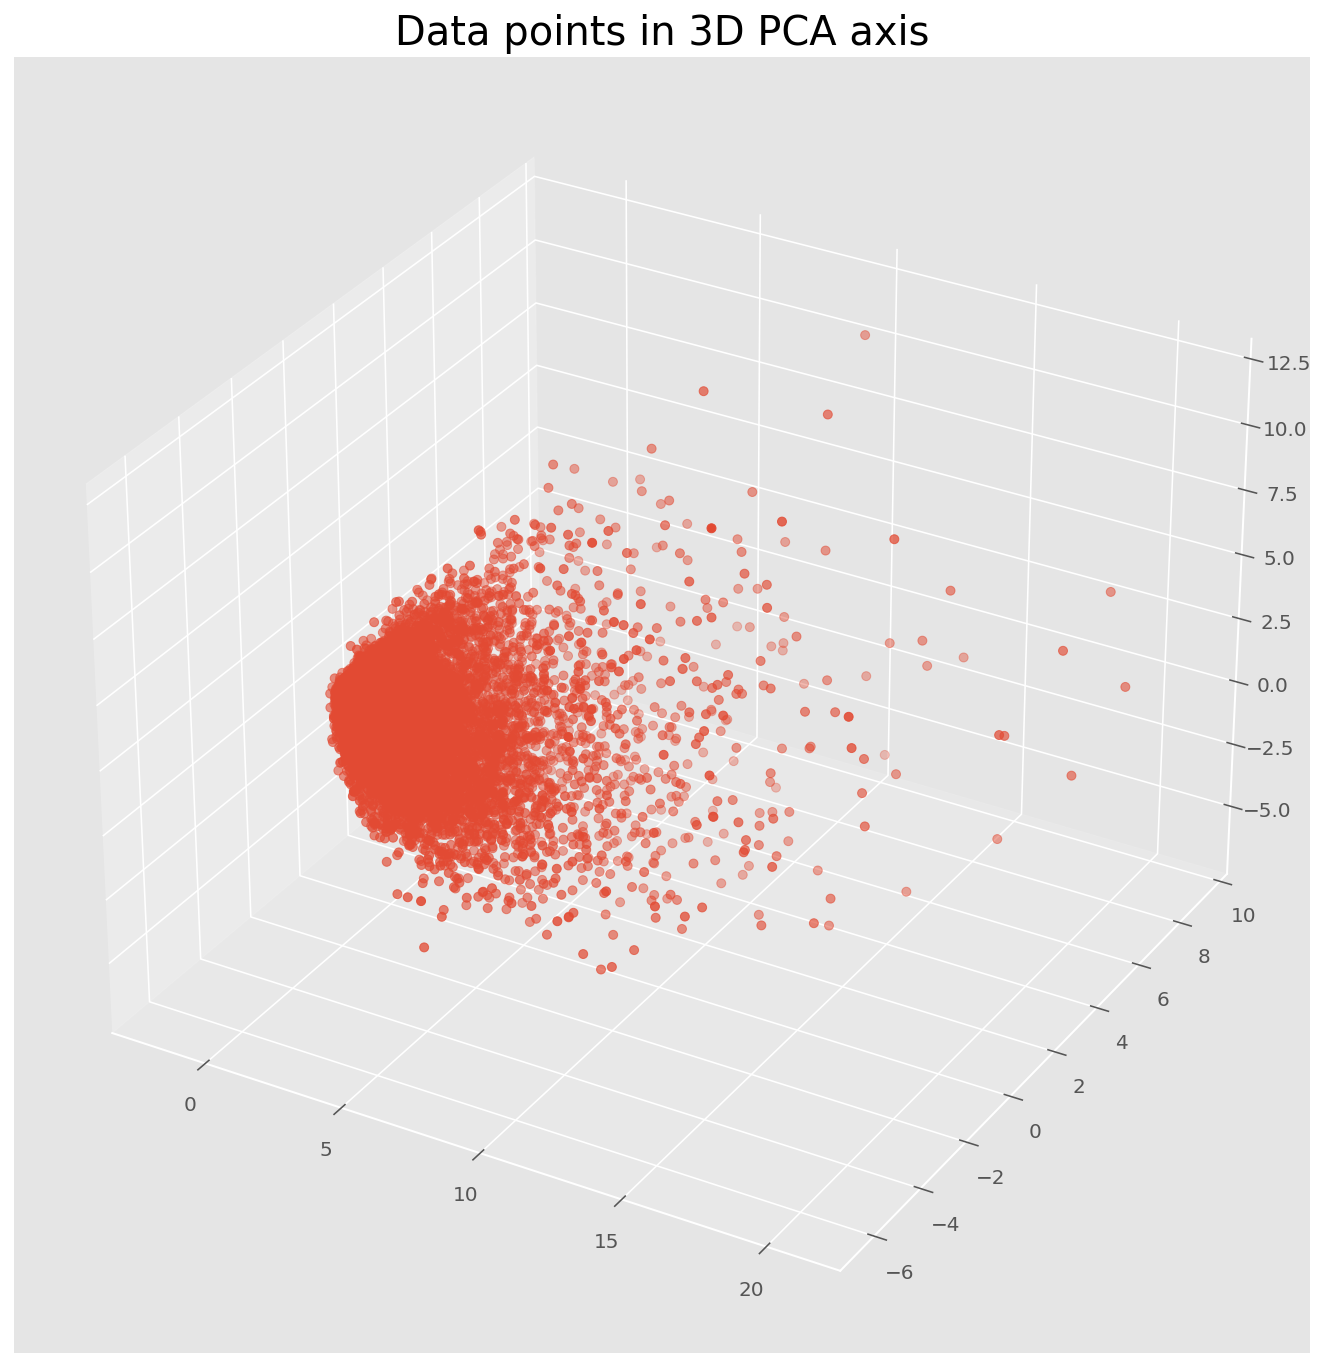

In [19]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

#### Selección de k

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

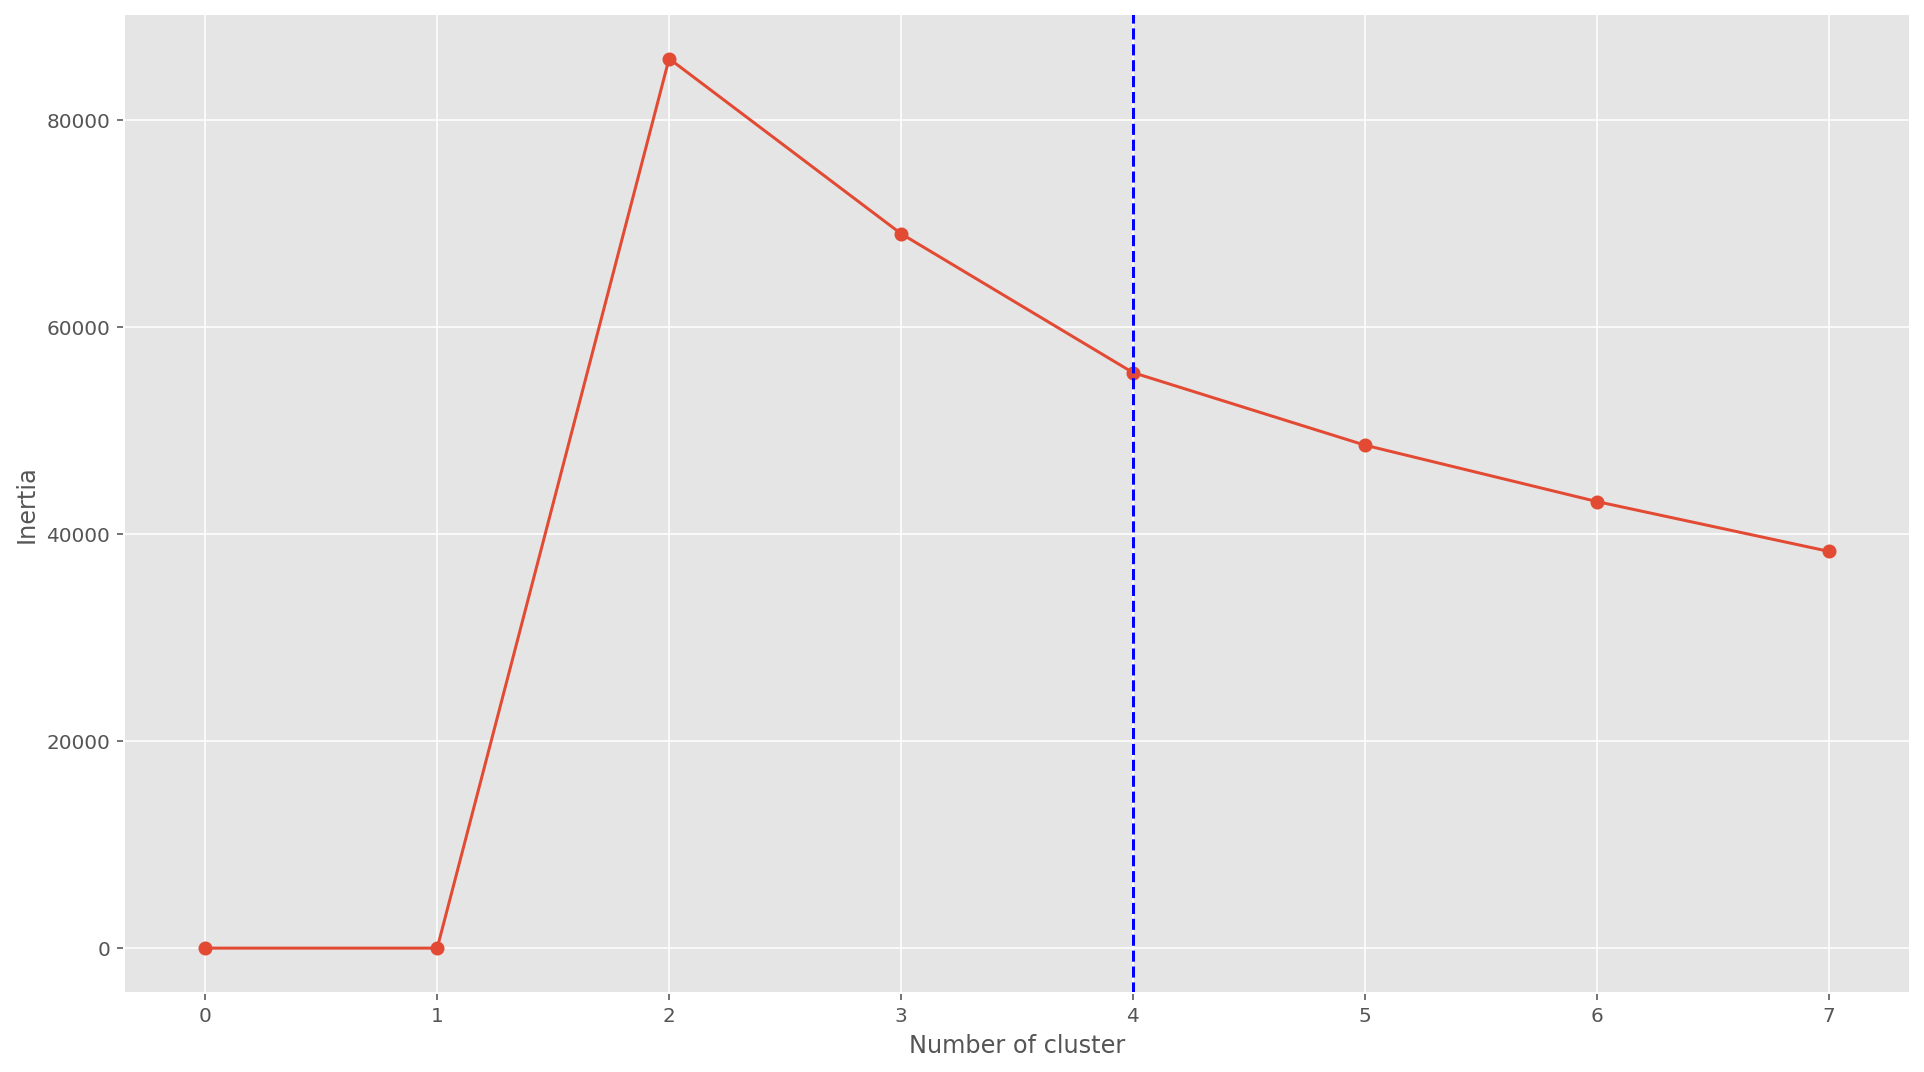

In [21]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

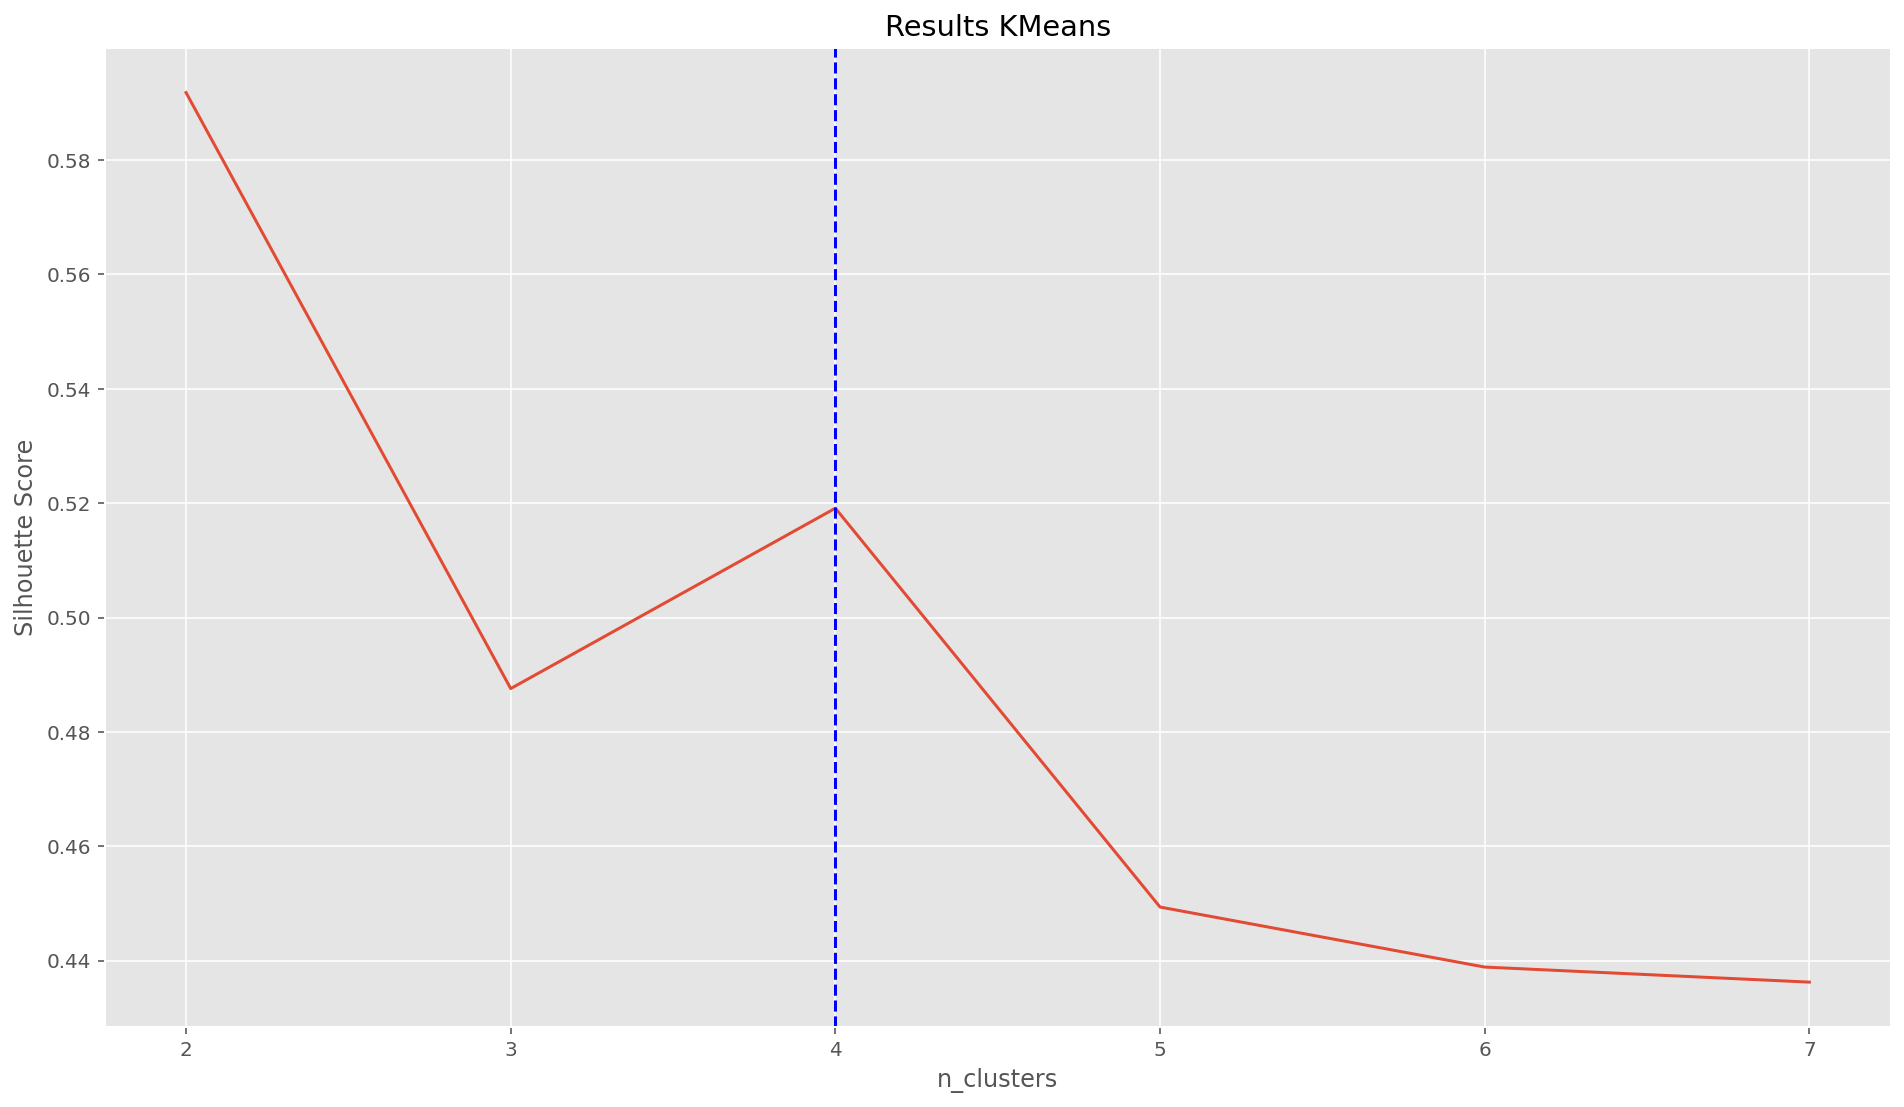

In [22]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

##### Se trabaja con 4 clústeres

In [23]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=8,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ 0.29583317 -0.62157236 -0.34260625]
 [ 2.91742148  3.35102153  0.71134934]
 [ 3.11318199 -0.26125395 -1.88606917]
 [ 6.88946961 -2.71467188  0.71781186]
 [ 0.08541169  1.38517424 -0.09924155]
 [-1.37536873 -0.09677745  0.12825574]
 [ 2.42703287 -1.52998188  1.11687157]
 [10.30624741  3.18868441  1.70980506]]


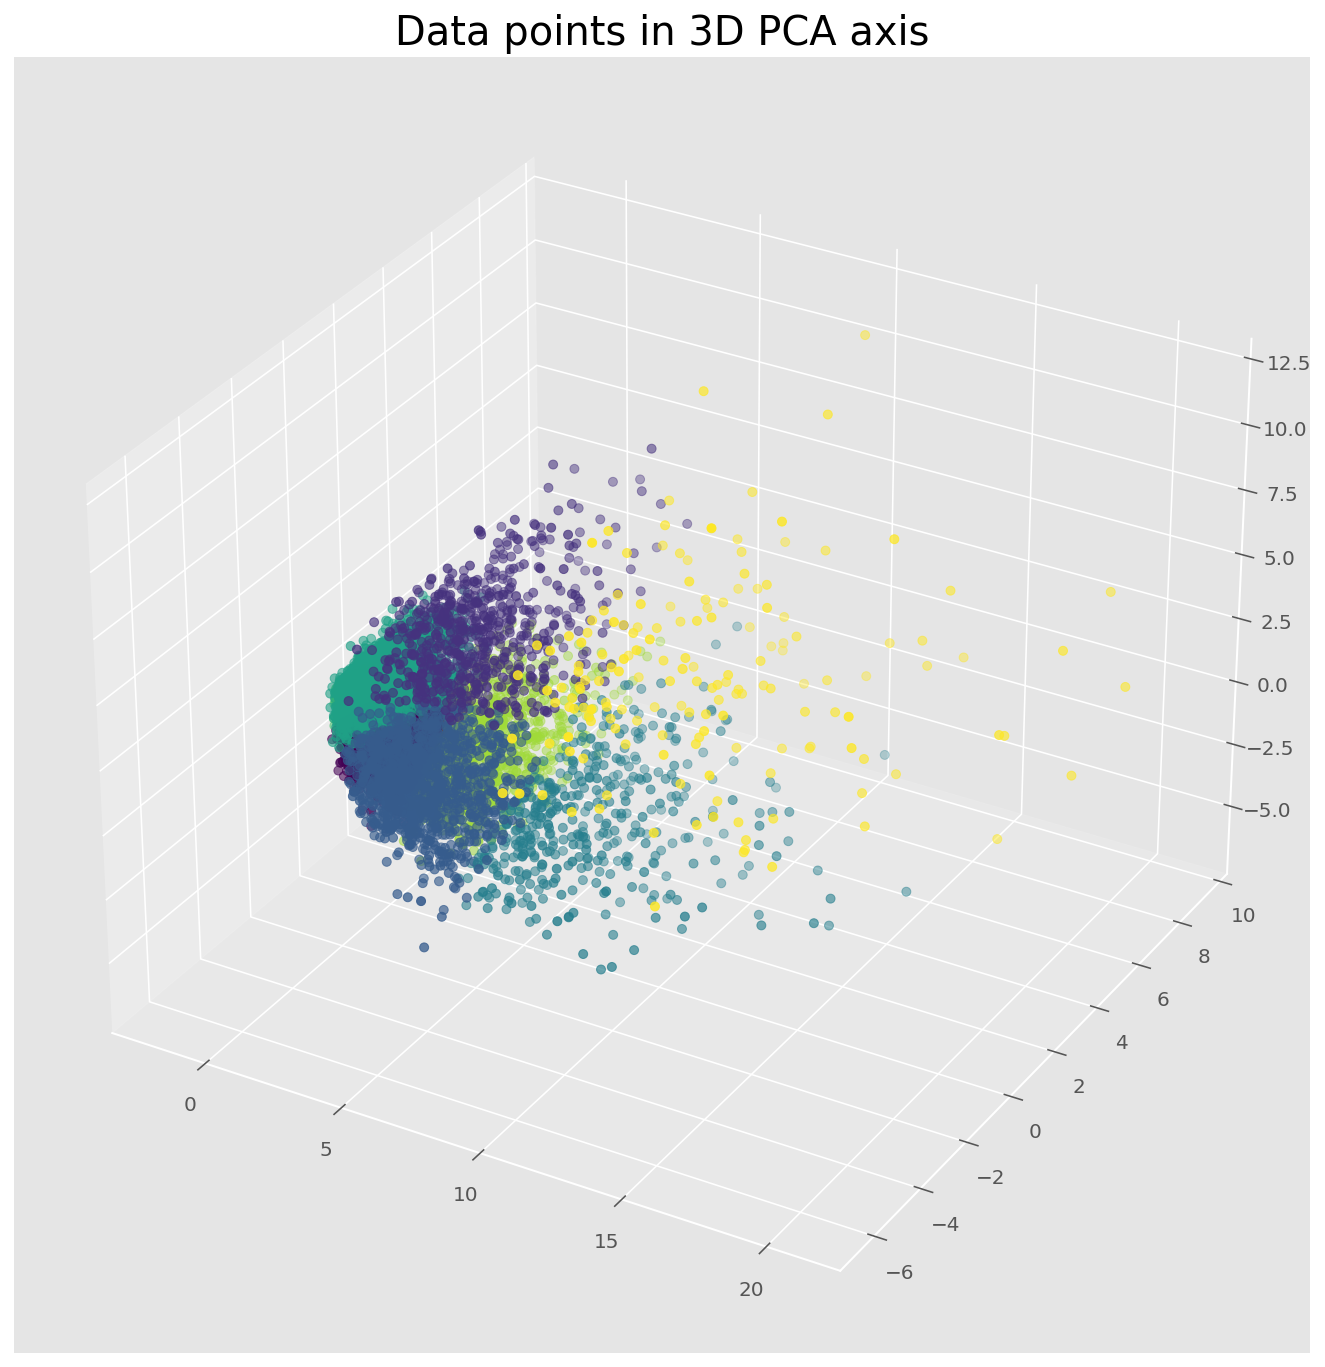

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

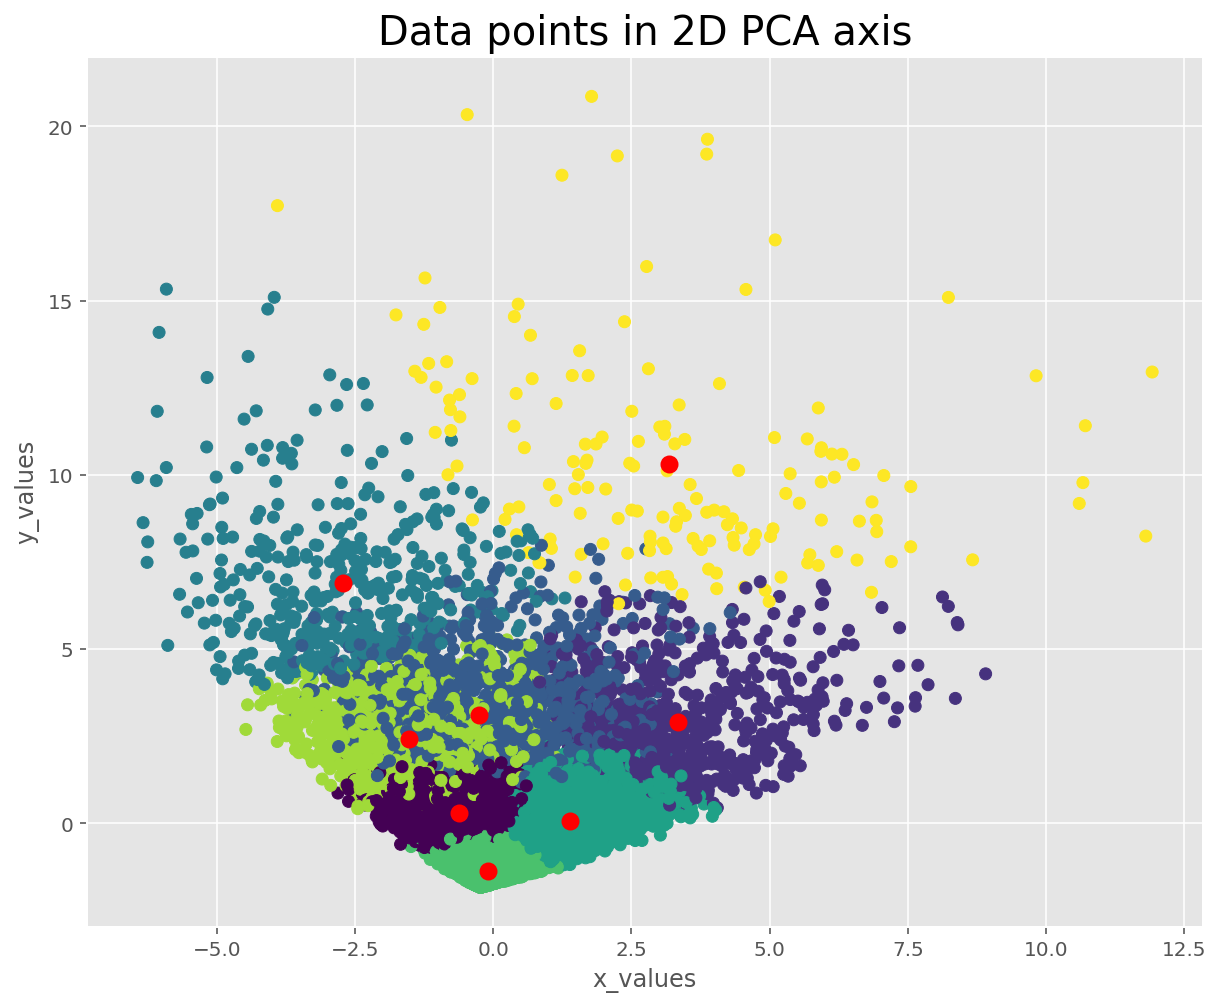

In [25]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [26]:
rating_anime['cluster'] = c_preds

In [27]:
rating_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


##### Característica de clúster

In [28]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [29]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

### Clúster 0

In [30]:
c0 = rating_anime[rating_anime['cluster']==0].drop('cluster',axis=1).mean()

In [31]:
c0.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.636308
Death Note                                                  0.528059
Sword Art Online                                            0.517019
Angel Beats!                                                0.446795
Fullmetal Alchemist: Brotherhood                            0.432076
No Game No Life                                             0.417050
Mirai Nikki (TV)                                            0.410304
Steins;Gate                                                 0.394971
Code Geass: Hangyaku no Lelouch                             0.378105
Code Geass: Hangyaku no Lelouch R2                          0.342226
Toradora!                                                   0.341920
Tokyo Ghoul                                                 0.336093
Ao no Exorcist                                              0.300828
Noragami                                                    0.294388
Ano Hi Mita Hana no Namae wo 

In [32]:
animelist = list(c0.index)
data = pd.DataFrame()

In [33]:
data['genre'],data['episode'],data['rating'],data['member'] = createAnimeInfoList(animelist)

In [34]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue
    set_keywords = set_keywords.union(liste_keywords)

In [35]:
!pip install wordcloud
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()
    for s in Dict:
        words[s[0]] = s[1]
        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)
    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

You should consider upgrading via the '/Users/kevintmtz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


##### Género favorito de clúster 0

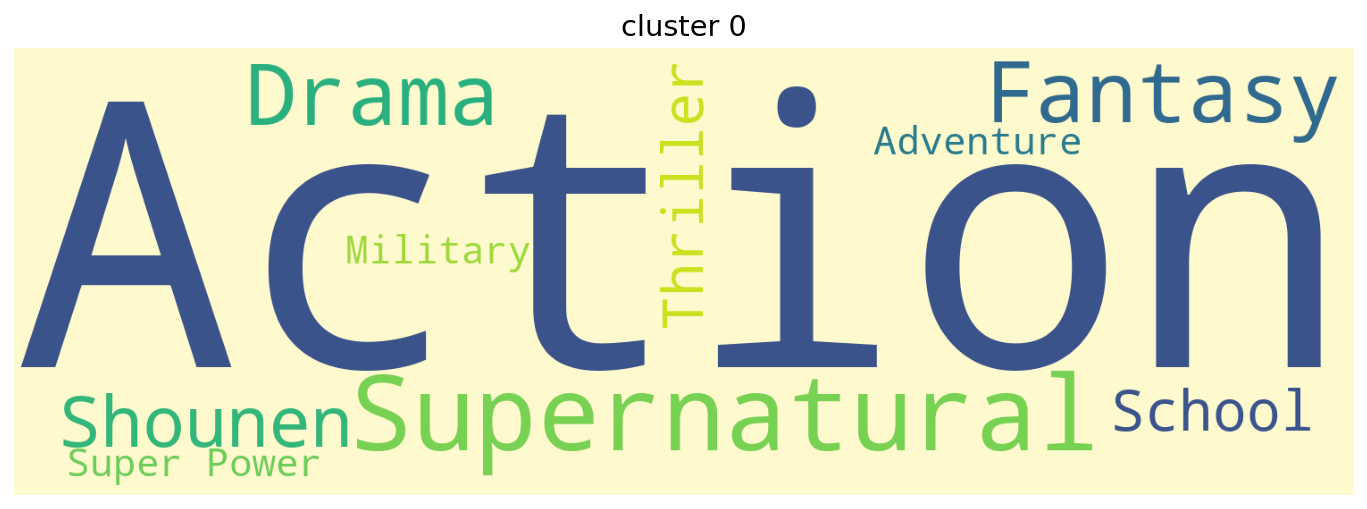

In [36]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [37]:
keyword_occurences[0:10]

[['Action', 10],
 [' Supernatural', 8],
 [' Fantasy', 5],
 [' Drama', 5],
 [' Shounen', 5],
 [' Thriller', 3],
 [' School', 3],
 [' Super Power', 3],
 [' Military', 3],
 [' Adventure', 3]]

In [38]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 24.066666666666666
AVG movie rating : 8.0
AVG member : 690047.2


### Clúster 1

In [39]:
c1 = rating_anime[rating_anime['cluster']==1].drop('cluster',axis=1).mean()

In [40]:
c1.sort_values(ascending=False)[0:15]

name
Code Geass: Hangyaku no Lelouch          0.804348
Code Geass: Hangyaku no Lelouch R2       0.755072
Suzumiya Haruhi no Yuuutsu               0.723188
Fullmetal Alchemist                      0.697101
Death Note                               0.679710
Toradora!                                0.657971
Tengen Toppa Gurren Lagann               0.649275
Neon Genesis Evangelion                  0.613043
Full Metal Panic!                        0.608696
Darker than Black: Kuro no Keiyakusha    0.602899
Clannad                                  0.595652
Cowboy Bebop                             0.586957
Full Metal Panic? Fumoffu                0.579710
Fullmetal Alchemist: Brotherhood         0.576812
Elfen Lied                               0.576812
dtype: float64

In [41]:
animelist = list(c1.index)
data = pd.DataFrame()

##### Género favorito de clúster 1

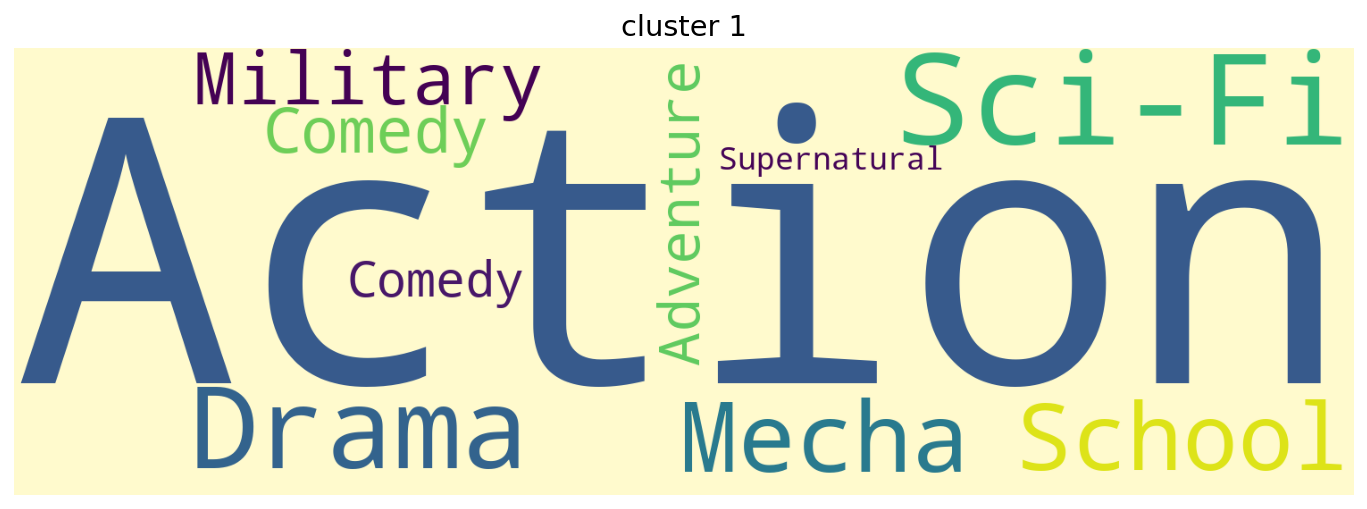

In [42]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","lemonchiffon")

In [43]:
keyword_occurences[0:10]

[['Action', 11],
 [' Sci-Fi', 8],
 [' Drama', 7],
 [' Mecha', 5],
 [' School', 5],
 [' Military', 5],
 [' Comedy', 5],
 [' Adventure', 4],
 ['Comedy', 3],
 [' Supernatural', 3]]

In [44]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 27.8
AVG movie rating : 7.933333333333334
AVG member : 555204.6


### Clúster 2

In [45]:
c2 = rating_anime[rating_anime['cluster']==2].drop('cluster',axis=1).mean()

In [46]:
c2.sort_values(ascending=False)[0:15]

name
Steins;Gate                                                 0.794892
Shingeki no Kyojin                                          0.782123
Fullmetal Alchemist: Brotherhood                            0.750998
Death Note                                                  0.710295
Code Geass: Hangyaku no Lelouch                             0.670391
Psycho-Pass                                                 0.654429
One Punch Man                                               0.651237
Code Geass: Hangyaku no Lelouch R2                          0.645650
No Game No Life                                             0.638468
Angel Beats!                                                0.616919
Fate/Zero                                                   0.607342
Fate/Zero 2nd Season                                        0.594573
Durarara!!                                                  0.591381
Kiseijuu: Sei no Kakuritsu                                  0.586592
Ano Hi Mita Hana no Namae wo 

In [47]:
animelist = list(c2.index)
data = pd.DataFrame()

##### Género favorito de clúster 2

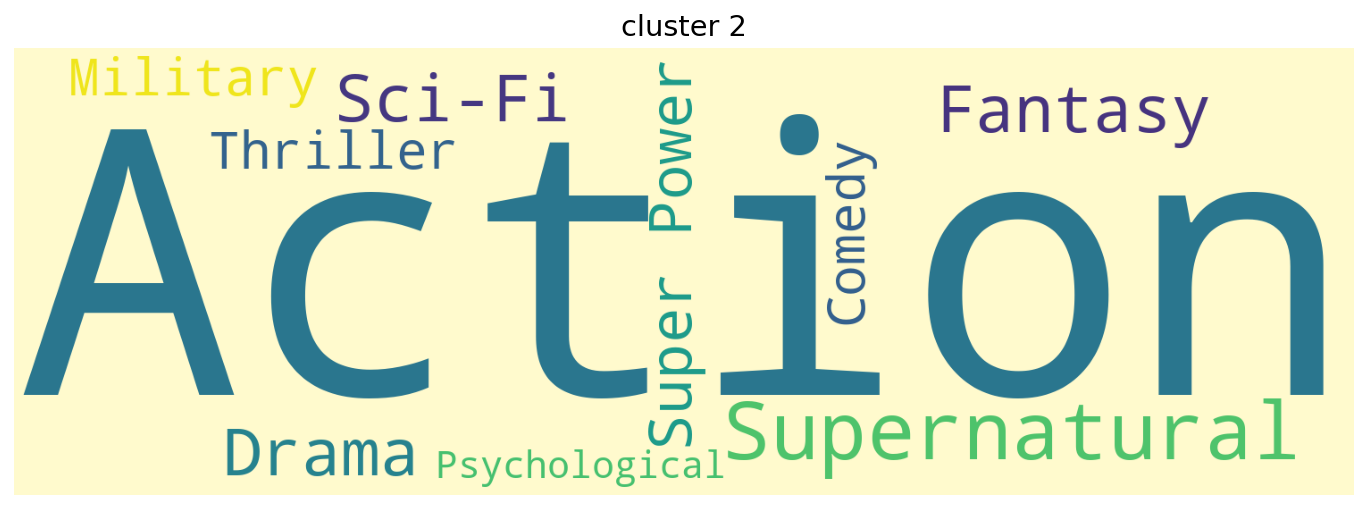

In [48]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","lemonchiffon")

In [49]:
keyword_occurences[0:10]

[['Action', 11],
 [' Supernatural', 8],
 [' Fantasy', 5],
 [' Sci-Fi', 5],
 [' Drama', 5],
 [' Super Power', 4],
 [' Thriller', 3],
 [' Military', 3],
 [' Comedy', 3],
 [' Psychological', 3]]

In [50]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 22.866666666666667
AVG movie rating : 8.133333333333333
AVG member : 619160.1333333333


### Clúster 3

In [51]:
c3 = rating_anime[rating_anime['cluster']==3].drop('cluster',axis=1).mean()

In [52]:
c3.sort_values(ascending=False)[0:15]

name
No Game No Life                                        0.913551
Angel Beats!                                           0.852804
Sword Art Online                                       0.836449
Shingeki no Kyojin                                     0.834112
Toradora!                                              0.799065
Noragami                                               0.787383
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.782710
Log Horizon                                            0.771028
Mirai Nikki (TV)                                       0.771028
Chuunibyou demo Koi ga Shitai!                         0.771028
Hataraku Maou-sama!                                    0.768692
Sakurasou no Pet na Kanojo                             0.764019
Nisekoi                                                0.752336
Steins;Gate                                            0.747664
Code Geass: Hangyaku no Lelouch                        0.728972
dtype: float64

In [53]:
animelist = list(c3.index)
data = pd.DataFrame()

##### Género favorito de clúster 3

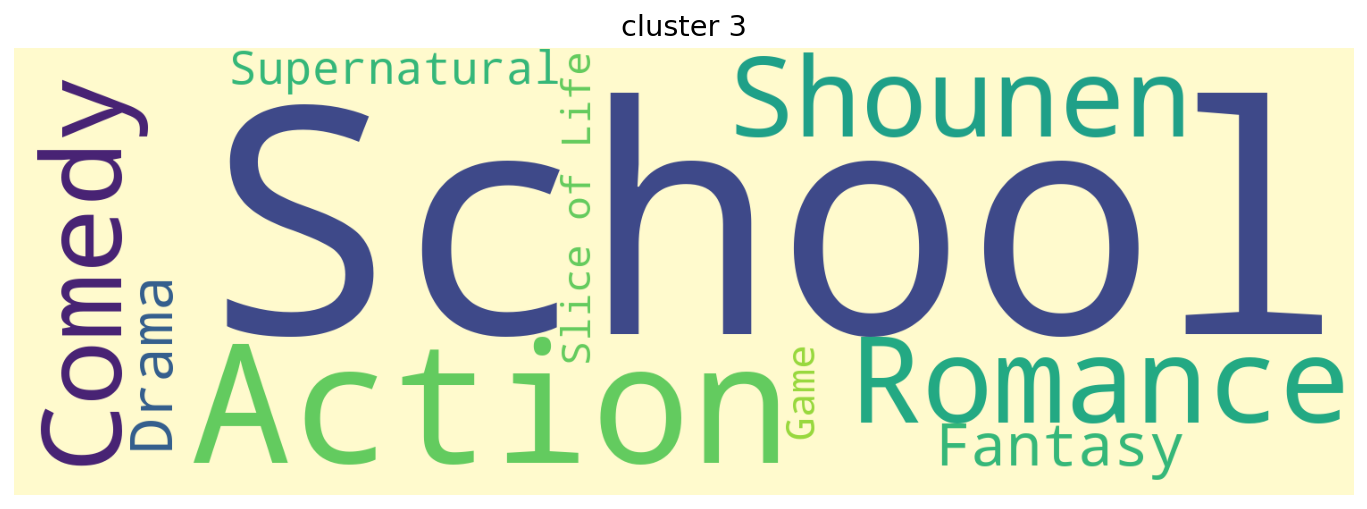

In [54]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","lemonchiffon")

In [55]:
keyword_occurences[0:10]

[[' School', 7],
 ['Action', 7],
 [' Romance', 7],
 ['Comedy', 6],
 [' Shounen', 6],
 [' Fantasy', 5],
 [' Drama', 5],
 [' Supernatural', 4],
 [' Game', 3],
 [' Slice of Life', 3]]

In [56]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 19.6
AVG movie rating : 7.866666666666666
AVG member : 571794.0


### Clúster 4

In [57]:
c4 = rating_anime[rating_anime['cluster']==4].drop('cluster',axis=1).mean()

In [58]:
c4.sort_values(ascending=False)[0:15]

name
Death Note                            0.618553
Sen to Chihiro no Kamikakushi         0.516993
Code Geass: Hangyaku no Lelouch       0.498601
Fullmetal Alchemist                   0.476609
Code Geass: Hangyaku no Lelouch R2    0.433826
Howl no Ugoku Shiro                   0.429828
Mononoke Hime                         0.415434
Cowboy Bebop                          0.413035
Neon Genesis Evangelion               0.401040
Elfen Lied                            0.387845
Fullmetal Alchemist: Brotherhood      0.370652
Tengen Toppa Gurren Lagann            0.360256
Suzumiya Haruhi no Yuuutsu            0.356657
Ouran Koukou Host Club                0.331068
Samurai Champloo                      0.326669
dtype: float64

In [59]:
animelist = list(c4.index)
data = pd.DataFrame()

##### Género favorito de clúster 4

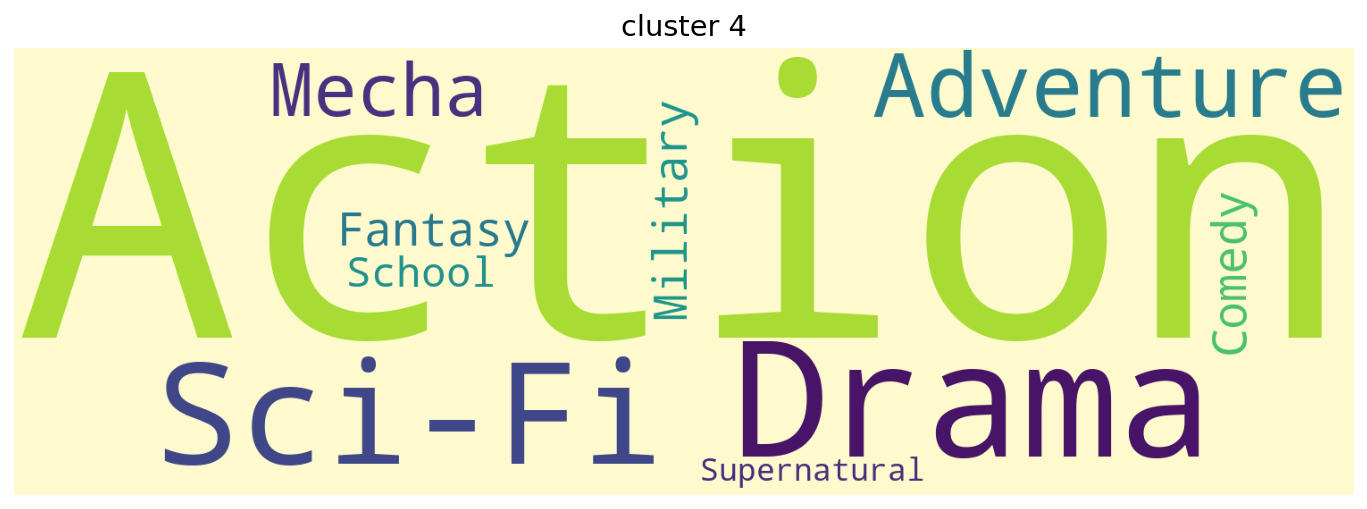

In [60]:
c4_animelist = list(c4.sort_values(ascending=False)[0:15].index)
c4_data = pd.DataFrame()
c4_data['genre'],c4_data['episode'],c4_data['rating'],c4_data['member'] =  createAnimeInfoList(c4_animelist)
c4_data.iloc[:,1:4] = c4_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c4_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 4","lemonchiffon")

In [61]:
keyword_occurences[0:10]

[['Action', 10],
 [' Drama', 8],
 [' Sci-Fi', 6],
 [' Adventure', 6],
 [' Mecha', 4],
 [' Fantasy', 4],
 [' Military', 4],
 [' Comedy', 4],
 [' School', 3],
 [' Supernatural', 3]]

In [62]:
print('cluster 4\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c4_data['episode'].mean(), c4_data['rating'].mean(),c4_data['member'].mean()))

cluster 4
AVG episode : 24.2
AVG movie rating : 8.0
AVG member : 547410.6666666666


### Clúster 5

In [63]:
c5 = rating_anime[rating_anime['cluster']==5].drop('cluster',axis=1).mean()

In [64]:
c5.sort_values(ascending=False)[0:15]

name
Death Note                            0.254642
Shingeki no Kyojin                    0.166256
Sword Art Online                      0.152804
Naruto                                0.122584
Fullmetal Alchemist: Brotherhood      0.121163
Code Geass: Hangyaku no Lelouch       0.115100
Fullmetal Alchemist                   0.112732
Sen to Chihiro no Kamikakushi         0.111501
Ouran Koukou Host Club                0.109132
Angel Beats!                          0.105911
Elfen Lied                            0.103354
Code Geass: Hangyaku no Lelouch R2    0.097291
Dragon Ball Z                         0.080807
Kuroshitsuji                          0.076544
Mirai Nikki (TV)                      0.076449
dtype: float64

In [65]:
animelist = list(c5.index)
data = pd.DataFrame()

##### Género favorito de clúster 5

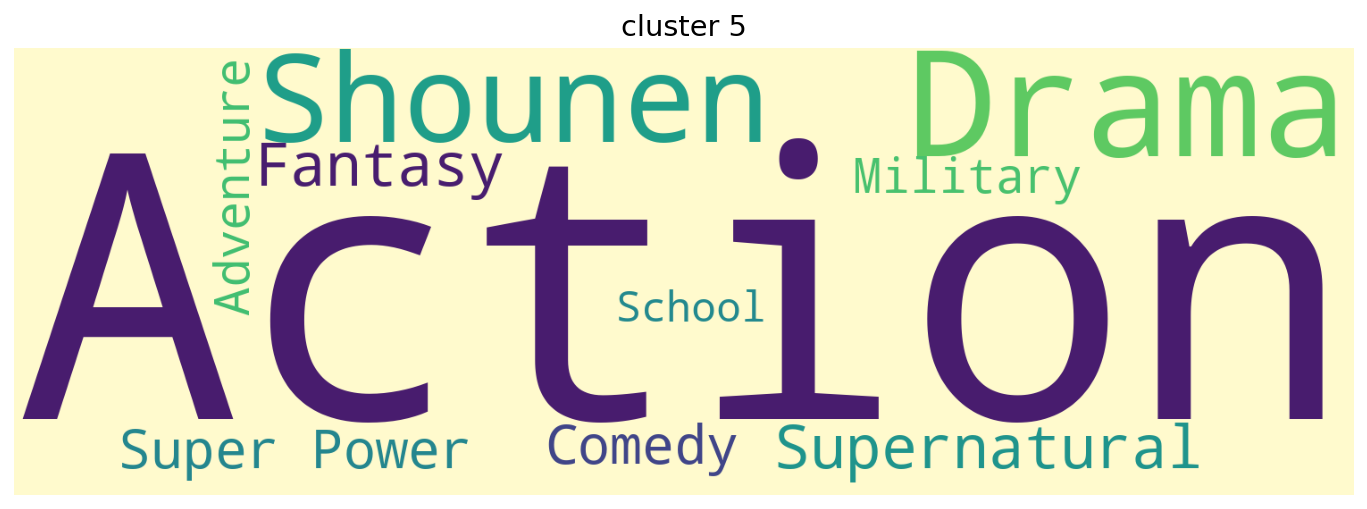

In [66]:
c5_animelist = list(c5.sort_values(ascending=False)[0:15].index)
c5_data = pd.DataFrame()
c5_data['genre'],c5_data['episode'],c5_data['rating'],c5_data['member'] =  createAnimeInfoList(c5_animelist)
c5_data.iloc[:,1:4] = c5_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c5_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 5","lemonchiffon")

In [67]:
keyword_occurences[0:10]

[['Action', 12],
 [' Drama', 7],
 [' Shounen', 7],
 [' Supernatural', 6],
 [' Fantasy', 6],
 [' Super Power', 5],
 [' Comedy', 5],
 [' Military', 4],
 [' Adventure', 4],
 [' School', 3]]

In [68]:
print('cluster 5\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c5_data['episode'].mean(), c5_data['rating'].mean(),c5_data['member'].mean()))

cluster 5
AVG episode : 57.733333333333334
AVG movie rating : 7.866666666666666
AVG member : 657082.2666666667


### Clúster 6

In [69]:
c6 = rating_anime[rating_anime['cluster']==6].drop('cluster',axis=1).mean()

In [70]:
c6.sort_values(ascending=False)[0:15]

name
Sword Art Online                0.782912
Angel Beats!                    0.669573
No Game No Life                 0.666085
Shingeki no Kyojin              0.653880
Toradora!                       0.578901
High School DxD                 0.578030
Mirai Nikki (TV)                0.560593
Highschool of the Dead          0.532694
Death Note                      0.514385
Sakurasou no Pet na Kanojo      0.508282
Guilty Crown                    0.500436
Hataraku Maou-sama!             0.492589
Date A Live                     0.491718
High School DxD New             0.484743
Boku wa Tomodachi ga Sukunai    0.475153
dtype: float64

In [71]:
animelist = list(c6.index)
data = pd.DataFrame()

##### Género favorito de clúster 6

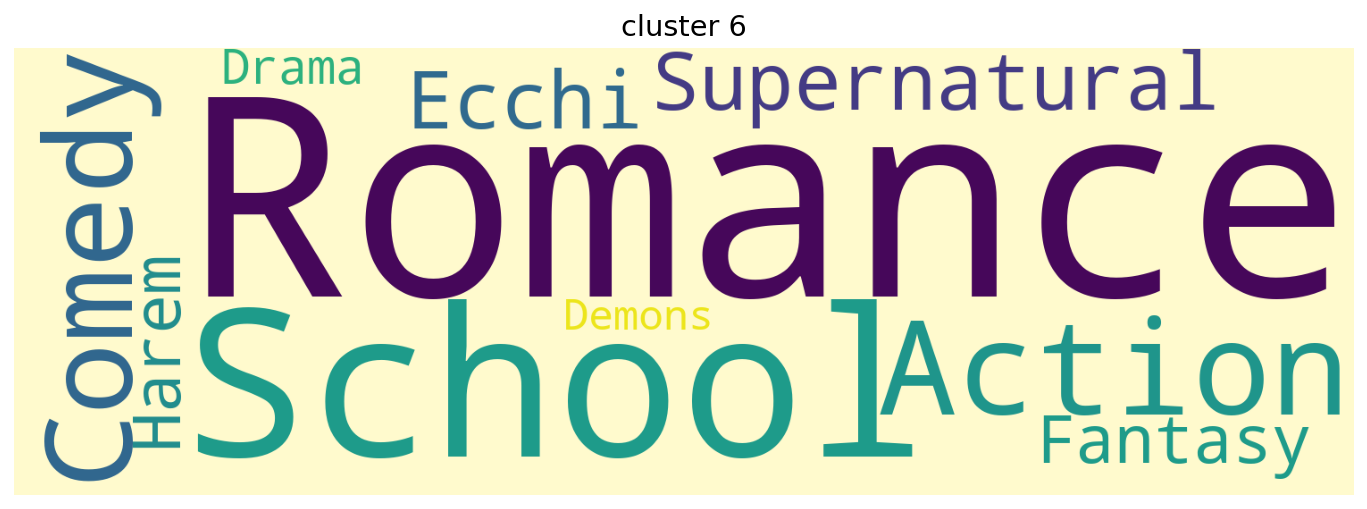

In [72]:
c6_animelist = list(c6.sort_values(ascending=False)[0:15].index)
c6_data = pd.DataFrame()
c6_data['genre'],c6_data['episode'],c6_data['rating'],c6_data['member'] =  createAnimeInfoList(c6_animelist)
c6_data.iloc[:,1:4] = c6_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c6_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 6","lemonchiffon")

In [73]:
keyword_occurences[0:10]

[[' Romance', 8],
 [' School', 7],
 ['Action', 7],
 ['Comedy', 6],
 [' Supernatural', 5],
 [' Ecchi', 5],
 [' Fantasy', 4],
 [' Harem', 4],
 [' Drama', 4],
 [' Demons', 3]]

In [74]:
print('cluster 6\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c6_data['episode'].mean(), c6_data['rating'].mean(),c6_data['member'].mean()))

cluster 6
AVG episode : 18.8
AVG movie rating : 7.533333333333333
AVG member : 566196.1333333333


### Clúster 7

In [75]:
c7 = rating_anime[rating_anime['cluster']==7].drop('cluster',axis=1).mean()

In [76]:
c7.sort_values(ascending=False)[0:15]

name
Toradora!                                                   0.920732
Code Geass: Hangyaku no Lelouch                             0.902439
Angel Beats!                                                0.890244
Steins;Gate                                                 0.878049
Code Geass: Hangyaku no Lelouch R2                          0.871951
Bakemonogatari                                              0.871951
Suzumiya Haruhi no Yuuutsu                                  0.865854
Durarara!!                                                  0.865854
Clannad                                                     0.853659
Death Note                                                  0.847561
Tengen Toppa Gurren Lagann                                  0.841463
Sword Art Online                                            0.823171
Ookami to Koushinryou                                       0.804878
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.    0.798780
Toaru Majutsu no Index       

In [77]:
animelist = list(c7.index)
data = pd.DataFrame()

##### Género favorito de clúster 7

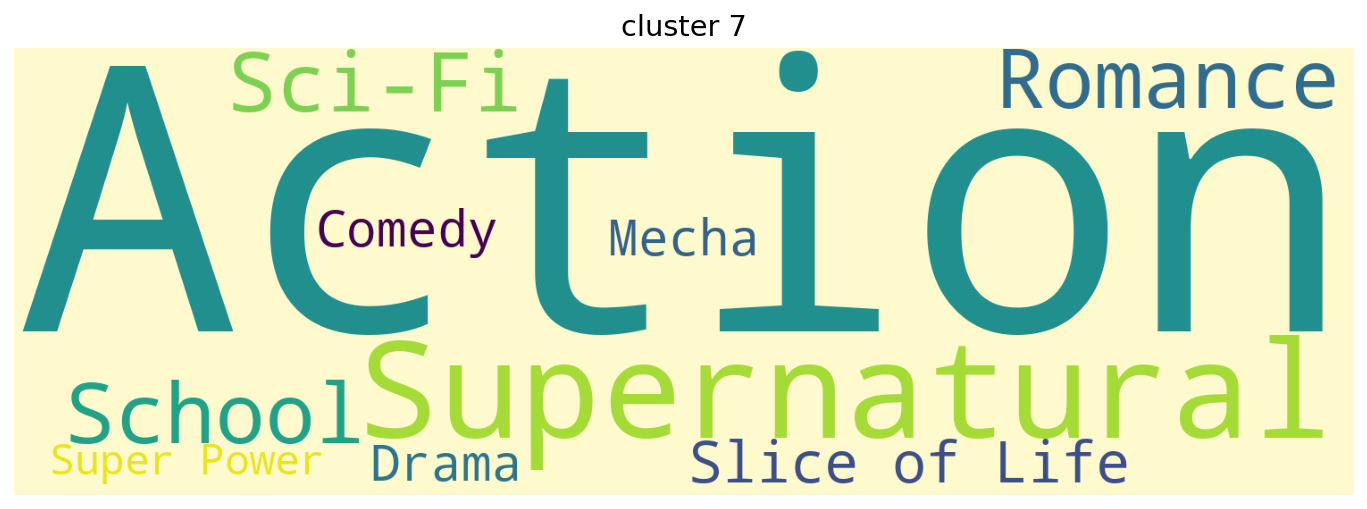

In [78]:
c7_animelist = list(c7.sort_values(ascending=False)[0:15].index)
c7_data = pd.DataFrame()
c7_data['genre'],c7_data['episode'],c7_data['rating'],c7_data['member'] =  createAnimeInfoList(c7_animelist)
c7_data.iloc[:,1:4] = c7_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c7_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 7","lemonchiffon")

In [79]:
keyword_occurences[0:10]

[['Action', 7],
 [' Supernatural', 6],
 [' School', 5],
 [' Sci-Fi', 5],
 [' Romance', 5],
 [' Slice of Life', 4],
 ['Comedy', 3],
 [' Mecha', 3],
 [' Drama', 3],
 [' Super Power', 3]]

In [80]:
print('cluster 7\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c7_data['episode'].mean(), c7_data['rating'].mean(),c7_data['member'].mean()))

cluster 7
AVG episode : 21.666666666666668
AVG movie rating : 7.933333333333334
AVG member : 595269.4666666667


### Clasificaciones

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scrapy import Selector
import requests
from scrapy.crawler import CrawlerProcess
import scrapy
from scrapy.utils.project import get_project_settings

In [82]:
rating2 = rating_anime.reset_index()

In [83]:
rating2 = rating2[['user_id', 'cluster']]

In [84]:
anime2 = pd.merge(anime, rating, on="anime_id", how="left")
anime2

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398.0,10.0,-0.832298
...,...,...,...,...,...,...,...,...,...,...
4264094,5543,Under World,Hentai,OVA,1,4.28,183,48766.0,-1.0,-1.000000
4264095,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,48766.0,-1.0,-1.000000
4264096,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532.0,-1.0,-1.000000
4264097,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766.0,-1.0,-1.000000


In [85]:
anime2 = anime2.merge(rating2)

In [86]:
helper = anime2[anime2['cluster'] == 0]

In [87]:
helper

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,cluster
528,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0,8.356322,0
529,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,322.0,10.0,8.356322,0
530,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,322.0,10.0,8.356322,0
531,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,322.0,9.0,8.356322,0
532,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,322.0,9.0,8.356322,0
...,...,...,...,...,...,...,...,...,...,...,...
1119380,8277,Hyakka Ryouran: Samurai Girls,"Action, Comedy, Ecchi, Harem, Samurai, School",TV,12,7.01,99201,1838.0,9.0,8.891304,0
1119381,15377,Hyakka Ryouran: Samurai Bride,"Action, Comedy, Ecchi, Harem, Samurai, School",TV,12,6.91,52542,1838.0,9.0,8.891304,0
1119382,9515,Highschool of the Dead: Drifters of the Dead,"Comedy, Ecchi, Supernatural",OVA,1,6.77,140501,1838.0,9.0,8.891304,0
1119383,10611,R-15,"Comedy, Ecchi, Harem, Romance, School",TV,12,6.70,53617,1838.0,9.0,8.891304,0


In [88]:
test = helper.sample(n = 10000)

In [89]:
test

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,cluster
1003461,14513,Magi: The Labyrinth of Magic,"Action, Adventure, Fantasy, Magic, Shounen",TV,25,8.24,317513,18539.0,10.0,9.310680,0
563766,6675,Redline,"Action, Cars, Sci-Fi, Sports",Movie,1,8.33,109392,18701.0,8.0,7.697802,0
508230,7592,Nurarihyon no Mago,"Action, Demons, Shounen, Supernatural",TV,24,7.78,122976,16533.0,9.0,7.907692,0
416180,19647,Hajime no Ippo: Rising,"Comedy, Drama, Shounen, Sports",TV,25,8.68,66756,12844.0,8.0,7.227053,0
58507,2759,Evangelion: 1.0 You Are (Not) Alone,"Action, Mecha, Sci-Fi",Movie,1,8.21,194561,17239.0,9.0,8.370370,0
...,...,...,...,...,...,...,...,...,...,...,...
128253,5081,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,8.39,482268,2287.0,8.0,7.542857,0
643873,2472,Naruto: Shippuuden Movie 1,"Action, Adventure, Comedy, Fantasy, Shounen",Movie,1,7.43,108170,3621.0,7.0,6.537736,0
996762,18393,Fairy Tail x Rave,"Action, Adventure, Comedy, Fantasy, Magic, Sho...",OVA,1,7.54,51844,15519.0,9.0,8.241259,0
644156,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,3672.0,9.0,7.146154,0


In [90]:
anime_data = pd.concat([test["genre"].str.get_dummies(sep=","),
                           test["type"].str.get_dummies(sep=","),test[["rating"]],
                            test[["members"]],test["episodes"],test["cluster"]],axis=1)

anime_data

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Movie,Music,ONA,OVA,Special,TV,rating,members,episodes,cluster
1003461,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,8.24,317513,25,0
563766,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,8.33,109392,1,0
508230,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,7.78,122976,24,0
416180,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,8.68,66756,25,0
58507,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,8.21,194561,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,8.39,482268,15,0
643873,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,7.43,108170,1,0
996762,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,7.54,51844,1,0
644156,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,8.82,552458,12,0


In [91]:
anime_data = MaxAbsScaler().fit_transform(anime_data)
anime_data

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.13154824e-01, 1.39899273e-02, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.07890488e-01, 5.59597090e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21288034e-01, 1.34303302e-02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.11323905e-02, 5.59597090e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.44874975e-01, 6.71516508e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.31758911e-01, 1.12479015e-01, 0.00000000e+00]])

### KNN

Con KNN tomaremos un anime y dependiendo de sus características podremos encontrar ánimes similares. Este algoritmo utiliza distancias al observar, con esto se crea un indicador de similitud entre animes.

In [92]:
KNNanime = NearestNeighbors(n_neighbors=8, algorithm='ball_tree').fit(anime_data)
distances, indices = KNNanime.kneighbors(anime_data)

In [93]:
def nombres_indices(name):
    return anime[anime["name"]==name].index.tolist()[0] 

In [94]:
def recomendados_por_anime(nombre): 
    found_id = nombres_indices(nombre)
    for id in indices[found_id][1:]:
        print(anime.loc[id]["name"])
            
recomendados_por_anime("Death Note")

Escha &amp; Logy no Atelier: Tasogare no Sora no Renkinjutsushi
Uta Kata
Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Yuushi The Animation
Kareshi Kanojo no Jijou
Rinne no Lagrange Season 2
Kennosuke-sama
Fruity Samurai


### Recomendaciones para usuarios

En esta parte se hacen recomendaciones basándonos en en el rating.csv que tiene información de cada usuario para utilizar dicha información y crear distancias que obtengan similitudes

In [95]:
def similar_animes(id_anime): 
    
    id_list=[]
    found_id = anime[anime["anime_id"]==id_anime].index.tolist()[0]  
    for id in indices[found_id][1:]:
            id_list.append(anime.loc[id]["anime_id"])
            
    return id_list  
        
            
def similar_animes_usuarios(id_user):  
    
    a = test[test["user_id"]==id_user].anime_id.values
    lista = []
    for i in range(len(a)):
        lista.append(similar_animes(a[i]))
    return lista
            
        
def similar_animes_usuarios_freq(id_user):
    a=similar_animes_usuarios(id_user)
    r= np.array([])
    for i in range(5):
        f1 = pd.Series( (v[i] for v in a))
        r = np.append(r,f1)
        
    gh = test[test["user_id"]==id_user].anime_id.values
    rdiff=np.setdiff1d(r, gh)
    kk = pd.DataFrame({'Column1':rdiff})
    pda = pd.crosstab(index=kk["Column1"].astype(int), columns= "count")
    pda2 = pda.value_counts().sort_index(ascending=False).sort_values(ascending=False).head(6).index.tolist() 
    return pda2
        
    
def recomendados_usuario(id_user): 
    
    a=similar_animes_usuarios_freq(id_user)
    for id in a:
        print(anime[anime["anime_id"]==id]["name"].values)

In [96]:
recomendados_usuario(5678)

### Web Scrapping

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scrapy import Selector
import requests
from scrapy.crawler import CrawlerProcess
import scrapy
from scrapy.utils.project import get_project_settings

In [98]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [99]:
anime.replace("Unknown", np.nan, inplace=True)
anime["episodes"] = anime["episodes"].astype(float)

In [100]:
nombres= anime[anime.isnull().any(axis=1)]
nombres = nombres["name"].values.tolist()

tipoAnime=pd.get_dummies(anime["type"]).columns
tipoAnime=tipoAnime.str.strip().unique().tolist()

genero=anime["genre"].str.get_dummies(sep=",").columns
genero=genero.str.strip().unique().tolist()

In [101]:
buscarURL = 'https://myanimelist.net/search/all?q='
urlAnime = []
for i in nombres:
    urlAnime.append(buscarURL + i)


class AnimeFcSpider(scrapy.Spider):
    name = 'anime_fc'

    def start_requests(self): 
        for url2 in urlAnime:
            yield scrapy.Request(url=url2,
                                 callback=self.parse_front)

    def parse_front(self, response): 
        course_links = response.xpath('//div[@class="picSurround di-tc thumb"]/a/@href')
        yield response.follow(url=course_links[0],
                              callback=self.parse_pages)

    def parse_pages(self, response):
        crs_name = response.xpath('//h1[@class="h1"]/span/text()').extract_first()
        crs_episodes = response.xpath('//td[@class="spaceit"]/span[@id="curEps"]/text()').extract_first()
        crs_rating = response.xpath('//span[@itemprop="ratingValue"]/text()').extract_first()
        crs_id = response.xpath('//input[@name="aid"]/@value').extract_first()

        crs_genre = response.xpath('//div/a/@title').extract()
        crs_genre = np.intersect1d(crs_genre, genero)
        crs_genre = ','.join(map(str, crs_genre))

        crs_type = response.xpath('//div/a/text()').extract()
        crs_type = np.intersect1d(crs_type,tipoAnime)
        crs_type = ','.join(map(str, crs_type))
        
        list_name.append(crs_name)
        list_genre.append(crs_genre)
        list_type.append(crs_type)
        list_episodes.append(crs_episodes)
        list_rating.append(crs_rating)
        list_id.append(crs_id)

        
list_name = list()
list_genre = list()
list_type = list()
list_episodes = list()
list_rating = list()
list_id = list()

s = get_project_settings()
s['CONCURRENT_REQUESTS_PER_IP'] = 16
s['CONCURRENT_REQUESTS_PER_DOMAIN '] = 16
s['DOWNLOAD_DELAY'] = 2.5
s['CONCURRENT_REQUESTS'] = 32
s['CONCURRENT_REQUESTS'] = 32


process = CrawlerProcess(s)
process.crawl(AnimeFcSpider)
process.start()

2021-11-03 16:05:41 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2021-11-03 16:05:41 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.8 (default, Apr 13 2021, 12:59:45) - [Clang 10.0.0 ], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform macOS-10.16-x86_64-i386-64bit
2021-11-03 16:05:41 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-11-03 16:05:41 [scrapy.crawler] INFO: Overridden settings:
{'CONCURRENT_REQUESTS': 32,
 'CONCURRENT_REQUESTS_PER_IP': 16,
 'DOWNLOAD_DELAY': 2.5}
2021-11-03 16:05:41 [scrapy.extensions.telnet] INFO: Telnet Password: f268a537c0904c38
2021-11-03 16:05:41 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2021-11-03 16:05:42 [

2021-11-03 16:06:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30694/Dragon_Ball_Super> (referer: https://myanimelist.net/search/all?q=Dragon%20Ball%20Super)
2021-11-03 16:06:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/2406/Sazae-san> (referer: https://myanimelist.net/search/all?q=Sazae-san)
2021-11-03 16:06:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kaitou%20Joker%204th%20Season> (referer: None)
2021-11-03 16:06:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Domo-kun> (referer: None)
2021-11-03 16:06:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/36904/Aggressive_Retsuko_ONA> (referer: https://myanimelist.net/search/all?q=Aggressive%20Retsuko)
2021-11-03 16:06:42 [scrapy.extensions.logstats] INFO: Crawled 41 pages (at 41 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:06:43 [scrapy.core.eng

2021-11-03 16:08:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33241/Honobono_Log> (referer: https://myanimelist.net/search/all?q=Bonobono%20(2016))
2021-11-03 16:08:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/1960/Sore_Ike_Anpanman> (referer: https://myanimelist.net/search/all?q=Sore%20Ike!%20Anpanman)
2021-11-03 16:08:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kamakura> (referer: None)
2021-11-03 16:08:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/10800/Chihayafuru> (referer: https://myanimelist.net/search/all?q=Chi&)
2021-11-03 16:08:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Modern%20No.2> (referer: None)
2021-11-03 16:08:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/4459/Ojarumaru> (referer: https://myanimelist.net/search/all?q=Ojarumaru)
2021-11-03 16:08:39 

2021-11-03 16:10:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31507/Ari_Ningen_Monogatari> (referer: https://myanimelist.net/search/all?q=Ari%20Ningen%20Monogatari)
2021-11-03 16:10:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Baki> (referer: None)
2021-11-03 16:10:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31760/Tsuru_Shitae_Waka_Kan> (referer: https://myanimelist.net/search/all?q=Tsuru%20Shitae%20Waka%20Kan)
2021-11-03 16:10:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Bary-san%20no%20Imabari-ben%20Kouza> (referer: None)
2021-11-03 16:11:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Blend> (referer: None)
2021-11-03 16:11:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/28587/Modern> (referer: https://myanimelist.net/search/all?q=Modern)
2021-11-03 16:11:08 [s

2021-11-03 16:13:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33863/Cakes> (referer: https://myanimelist.net/search/all?q=Cakes)
2021-11-03 16:13:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Gohan%20Kaijuu%20Pap> (referer: None)
2021-11-03 16:13:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Gra-P%20&amp;%20Rodeo%202nd%20Season> (referer: None)
2021-11-03 16:13:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Guitar> (referer: None)
2021-11-03 16:13:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Hanakappa> (referer: None)
2021-11-03 16:13:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/29655/Chanda_Gou> (referer: https://myanimelist.net/search/all?q=Chanda%20Gou)
2021-11-03 16:13:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all

2021-11-03 16:15:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32636/Hokori_Inu_no_Hanashi> (referer: https://myanimelist.net/search/all?q=Hokori%20Inu%20no%20Hanashi)
2021-11-03 16:15:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/manga/80285/Holiday_Love__Fuufukan_Renai> (referer: https://myanimelist.net/search/all?q=Holiday)
2021-11-03 16:15:42 [scrapy.extensions.logstats] INFO: Crawled 228 pages (at 19 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:15:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kaette%20Kite%20yoo%20Toyama%20kara> (referer: None)
2021-11-03 16:15:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kakuchou%20Shoujo-Kei%20Trinary> (referer: None)
2021-11-03 16:15:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kamigami%20no%20Ki> (referer: None)
2021-11-03 16:15:52 [scrapy.core.e

2021-11-03 16:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/24977/Kana_Kana_Kazoku> (referer: https://myanimelist.net/search/all?q=Kana%20Kana%20Kazoku)
2021-11-03 16:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30435/Kankou_Taisen_Saitama__Sakuya_no_Tatakai> (referer: https://myanimelist.net/search/all?q=Kankou%20Taisen%20Saitama:%20Sakuya%20no%20Tatakai)
2021-11-03 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Mim%20Mam%20Mint> (referer: None)
2021-11-03 16:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31506/Kappa_no_Ude> (referer: https://myanimelist.net/search/all?q=Kappa%20no%20Ude)
2021-11-03 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/29489/Karasu_no_Puuta> (referer: https://myanimelist.net/search/all?q=Karasu%20no%20Puuta)
2021-11-03 16:18:08 [scrapy.core.engine] DEBUG: Crawled (2

2021-11-03 16:20:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Panpaka%20Pants> (referer: None)
2021-11-03 16:20:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Panpaka%20Pants%20W-O-New!> (referer: None)
2021-11-03 16:20:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=PePePePengiin> (referer: None)
2021-11-03 16:20:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/29427/Mori_no_Ratio> (referer: https://myanimelist.net/search/all?q=Mori%20no%20Ratio)
2021-11-03 16:20:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Pic-lele> (referer: None)
2021-11-03 16:20:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33479/Muzumuzu_Eighteen> (referer: https://myanimelist.net/search/all?q=Muzumuzu%20Eighteen)
2021-11-03 16:20:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://m

2021-11-03 16:22:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Tokyo%20SOS> (referer: None)
2021-11-03 16:22:42 [scrapy.extensions.logstats] INFO: Crawled 366 pages (at 19 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:22:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/22297/Fate_stay_night__Unlimited_Blade_Works> (referer: https://myanimelist.net/search/all?q=Qin%20Shiming%20Yue%20Zhi:%20Junlin%20Tianxia)
2021-11-03 16:22:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33318/Scripta_Volant> (referer: https://myanimelist.net/search/all?q=Scripta%20Volant)
2021-11-03 16:22:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Tomodachi%208-nin> (referer: None)
2021-11-03 16:22:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Toshi%20Souzou%20Gakubu%20Shoukai> (referer: None)
2021-11-03 16:22:56 [scrapy

2021-11-03 16:25:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32916/YanYan_Machiko_Specials> (referer: https://myanimelist.net/search/all?q=YanYan%20Machiko%20Specials)
2021-11-03 16:25:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32644/Yaseruyagi> (referer: https://myanimelist.net/search/all?q=Yaseruyagi)
2021-11-03 16:25:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30119/Yowamushi_Monsters> (referer: https://myanimelist.net/search/all?q=Yowamushi%20Monsters)
2021-11-03 16:25:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34613/Garo__Honoo_no_Kokuin_-_Yurugaro> (referer: https://myanimelist.net/search/all?q=Yurugaro)
2021-11-03 16:25:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Sword%20Art%20Online%20Movie:%20Ordinal%20Scale> (referer: None)
2021-11-03 16:25:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET 

2021-11-03 16:27:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/30455/Kantai_Collection__KanColle_Zoku-hen> (referer: https://myanimelist.net/search/all?q=Kantai%20Collection:%20KanColle%20Zoku-hen)
2021-11-03 16:27:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=ACCA:%2013-ku%20Kansatsu-ka> (referer: None)
2021-11-03 16:27:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=After%20School> (referer: None)
2021-11-03 16:27:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33047/Fate_Extra__Last_Encore> (referer: https://myanimelist.net/search/all?q=Fate/Extra%20Last%20Encore)
2021-11-03 16:27:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31783/Yowamushi_Pedal__New_Generation> (referer: https://myanimelist.net/search/all?q=Yowamushi%20Pedal:%20New%20Generation)
2021-11-03 16:27:42 [scrapy.core.engine] DEBUG: Crawled (2

2021-11-03 16:29:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Cardcaptor%20Sakura:%20Clear%20Card-hen> (referer: None)
2021-11-03 16:29:42 [scrapy.extensions.logstats] INFO: Crawled 501 pages (at 20 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:29:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Cencoroll%202> (referer: None)
2021-11-03 16:29:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/3470/Special_A> (referer: https://myanimelist.net/search/all?q=Amanchu!%20Special)
2021-11-03 16:29:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Centaur%20no%20Nayami> (referer: None)
2021-11-03 16:29:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Chain%20Chronicle:%20Haecceitas%20no%20Hikari> (referer: None)
2021-11-03 16:29:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.ne

2021-11-03 16:31:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/28377/Choujikuu_Robo_Meguru> (referer: https://myanimelist.net/search/all?q=Choujikuu%20Robo%20Meguru)
2021-11-03 16:31:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34257/Cinderella_Girls_Gekijou> (referer: https://myanimelist.net/search/all?q=Cinderella%20Girls%20Gekijou)
2021-11-03 16:32:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/manga/65155/Clockwork_Planet> (referer: https://myanimelist.net/search/all?q=Clockwork%20Planet)
2021-11-03 16:32:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Ensemble%20Stars!> (referer: None)
2021-11-03 16:32:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32152/Closers__Side_Blacklambs> (referer: https://myanimelist.net/search/all?q=Closers:%20Side%20Blacklambs)
2021-11-03 16:32:08 [scrapy.core.engine] DEBUG: Crawled (200)

2021-11-03 16:34:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34321/Fate_Grand_Order__First_Order> (referer: https://myanimelist.net/search/all?q=Fate/Grand%20Order:%20First%20Order)
2021-11-03 16:34:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34100/Fate_kaleid_liner_Prisma%E2%98%86Illya_Movie__Sekka_no_Chikai> (referer: https://myanimelist.net/search/all?q=Fate/kaleid%20liner%20Prisma%E2%98%86Illya%20Movie)
2021-11-03 16:34:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/character/147050/Finis> (referer: https://myanimelist.net/search/all?q=Finis)
2021-11-03 16:34:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31376/Flying_Witch> (referer: https://myanimelist.net/search/all?q=Flying%20Babies)
2021-11-03 16:34:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34427/Frame_Arms_Girl> (referer: https://myanimelist.net/search/all?q=

2021-11-03 16:36:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kizumonogatari%20III:%20Reiketsu-hen> (referer: None)
2021-11-03 16:36:42 [scrapy.extensions.logstats] INFO: Crawled 637 pages (at 19 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:36:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33797/ID-0> (referer: https://myanimelist.net/search/all?q=ID-0)
2021-11-03 16:36:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34028/Idol_Jihen> (referer: https://myanimelist.net/search/all?q=Idol%20Jihen)
2021-11-03 16:36:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Knight&#039;s%20&amp;%20Magic> (referer: None)
2021-11-03 16:36:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Kobayashi-san%20Chi%20no%20Maid%20Dragon> (referer: None)
2021-11-03 16:36:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET

2021-11-03 16:38:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Netsuzou%20TRap> (referer: None)
2021-11-03 16:38:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34151/Landreaall> (referer: https://myanimelist.net/search/all?q=Landreaall)
2021-11-03 16:38:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=New%20Game!:%20Watashi,%20Shain%20Ryokou%20tte%20Hajimete%20nano%20de...> (referer: None)
2021-11-03 16:38:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/manga/131350/Locker_Room> (referer: https://myanimelist.net/search/all?q=Locker%20Room)
2021-11-03 16:39:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34021/Lupin_the_IIIrd__Chikemuri_no_Ishikawa_Goemon> (referer: https://myanimelist.net/search/all?q=Lupin%20the%20IIIrd:%20Chikemuri%20no%20Ishikawa%20Goemon)
2021-11-03 16:39:05 [scrapy.core.engine] DEBUG: Crawled (200

2021-11-03 16:41:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34148/Nyanko_Days> (referer: https://myanimelist.net/search/all?q=Nyanko%20Days)
2021-11-03 16:41:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34392/One_Room> (referer: https://myanimelist.net/search/all?q=One%20Room)
2021-11-03 16:41:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33983/Onihei> (referer: https://myanimelist.net/search/all?q=Onihei)
2021-11-03 16:41:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32013/Oshiete_Galko-chan> (referer: https://myanimelist.net/search/all?q=Oshiete!%20Galko-chan%20(OVA))
2021-11-03 16:41:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34262/Oushitsu_Kyoushi_Heine> (referer: https://myanimelist.net/search/all?q=Oushitsu%20Kyoushi%20Haine)
2021-11-03 16:41:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanim

2021-11-03 16:43:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Tokyo%20Futago%20Athletic> (referer: None)
2021-11-03 16:43:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/37054/Sentai_Hero_Sukiyaki_Force__Gunma_no_Heiwa_wo_Negau_Season_e_Mata> (referer: https://myanimelist.net/search/all?q=Sentai%20Hero%20Sukiyaki%20Force)
2021-11-03 16:43:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34315/Shimajirou_to_Niji_no_Oasis> (referer: https://myanimelist.net/search/all?q=Shimajirou%20to%20Niji%20no%20Oasis)
2021-11-03 16:43:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Trick%20or%20Alice> (referer: None)
2021-11-03 16:43:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Trinity%20Seven%20Movie:%20Eternity%20Library%20to%20Alchemic%20Girl> (referer: None)
2021-11-03 16:43:34 [scrapy.core.engine] DEBUG: Crawled 

2021-11-03 16:45:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34474/Tsukipro_The_Animation> (referer: https://myanimelist.net/search/all?q=Tsukipro%20The%20Animation)
2021-11-03 16:45:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34498/Uchiage_Hanabi_Shita_kara_Miru_ka_Yoko_kara_Miru_ka> (referer: https://myanimelist.net/search/all?q=Uchiage%20Hanabi,%20Shita%20kara%20Miru%20ka?%20Yoko%20kara%20Miru%20ka?)
2021-11-03 16:45:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Yuuki%20Yuuna%20wa%20Yuusha%20de%20Aru:%20Washio%20Sumi%20no%20Shou> (referer: None)
2021-11-03 16:45:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Yuuki%20Yuuna%20wa%20Yuusha%20de%20Aru:%20Yuusha%20no%20Shou> (referer: None)
2021-11-03 16:45:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Yuyushiki%20Special> (referer: None)
2021-11-0

2021-11-03 16:47:42 [scrapy.extensions.logstats] INFO: Crawled 853 pages (at 20 pages/min), scraped 0 items (at 0 items/min)
2021-11-03 16:47:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Hachishaku%20Hachiwa%20Keraku%20Meguri:%20Igyou%20Kaikitan%20The%20Animation> (referer: None)
2021-11-03 16:47:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=JK%20to%20Ero%20Konbini%20Tenchou> (referer: None)
2021-11-03 16:47:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33322/JK_Bitch_ni_Shiboraretai> (referer: https://myanimelist.net/search/all?q=JK%20Bitch%20ni%20Shiboraretai)
2021-11-03 16:47:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=300%20En%20no%20Otsukiai> (referer: None)
2021-11-03 16:47:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/31789/Oni_Chichi__Vacation> (referer: https://myanimelist.net/search/al

2021-11-03 16:49:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/33153/Houkago_Initiation> (referer: https://myanimelist.net/search/all?q=Houkago%20Initiation)
2021-11-03 16:49:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/32016/Secret_Journey> (referer: https://myanimelist.net/search/all?q=Secret%20Journey)
2021-11-03 16:49:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Saimin%20Class> (referer: None)
2021-11-03 16:49:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Shikkoku%20no%20Shaga%20The%20Animation> (referer: None)
2021-11-03 16:49:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/search/all?q=Taimanin%20Asagi%203> (referer: None)
2021-11-03 16:50:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://myanimelist.net/anime/34030/Bokura_no_Sex> (referer: https://myanimelist.net/search/all?q=Bokura%20no%20Sex)
2

In [103]:
DataNa = pd.DataFrame({"anime_id":list_id, "name":list_name,"genre":list_genre, "type":list_type, "episodes":list_episodes, "rating":list_rating})

DataNa.replace("", np.nan, inplace=True) 
DataNa.replace('?', np.nan, inplace=True)

print(DataNa.shape)
print(DataNa.isnull().sum()) 
DataNa.head(10)

(454, 6)
anime_id     14
name        454
genre        33
type         17
episodes     53
rating      126
dtype: int64


,anime_id,name,genre,type,episodes,rating
0,21,None,"Action,Adventure,Comedy,Drama,Fantasy,Shounen,...",TV,NaN,8.60
1,19067,None,Game,TV,64,6.71
2,235,None,"Adventure,Comedy,Mystery,Police,Shounen",TV,NaN,8.16
3,1735,None,"Action,Adventure,Comedy,Martial Arts,Shounen,S...",TV,500,8.22
4,966,None,"Comedy,Ecchi,School,Seinen,Slice of Life",TV,NaN,7.72
5,7505,None,"Comedy,Drama,Fantasy,Kids",TV,NaN,6.11
6,33157,None,"Comedy,School,Slice of Life",Special,7,7.42
7,34754,None,"Fantasy,Slice of Life",TV,59,6.68
8,21639,None,"Action,Fantasy,Game,Shounen",TV,148,6.72
9,8687,None,"Comedy,Kids,Sci-Fi,Shounen",TV,NaN,7.58


In [106]:
DataNa.to_csv('my_anime_list.csv', index=False)

In [184]:
DataNa = pd.read_csv("my_anime_list.csv", sep=',', header=0)
DataNa

,anime_id,name,genre,type,episodes,rating
0,21.0,NaN,"Action,Adventure,Comedy,Drama,Fantasy,Shounen,...",TV,NaN,8.60
1,19067.0,NaN,Game,TV,64.0,6.71
2,235.0,NaN,"Adventure,Comedy,Mystery,Police,Shounen",TV,NaN,8.16
3,1735.0,NaN,"Action,Adventure,Comedy,Martial Arts,Shounen,S...",TV,500.0,8.22
4,966.0,NaN,"Comedy,Ecchi,School,Seinen,Slice of Life",TV,NaN,7.72
...,...,...,...,...,...,...
449,34492.0,NaN,Hentai,OVA,4.0,6.37
450,34491.0,NaN,Hentai,OVA,1.0,6.23
451,34312.0,NaN,Hentai,OVA,2.0,6.28
452,34388.0,NaN,Hentai,OVA,3.0,7.29


In [185]:
# Drop all null
DataNa = DataNa.assign(name='Anime Name')
DataNa = DataNa.dropna()
print(DataNa.shape)
print(DataNa.isnull().sum())
DataNa.head(10)

(287, 6)
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
dtype: int64


,anime_id,name,genre,type,episodes,rating
1,19067.0,Anime Name,Game,TV,64.0,6.71
3,1735.0,Anime Name,"Action,Adventure,Comedy,Martial Arts,Shounen,S...",TV,500.0,8.22
6,33157.0,Anime Name,"Comedy,School,Slice of Life",Special,7.0,7.42
7,34754.0,Anime Name,"Fantasy,Slice of Life",TV,59.0,6.68
8,21639.0,Anime Name,"Action,Fantasy,Game,Shounen",TV,148.0,6.72
10,32410.0,Anime Name,"Sci-Fi,Seinen",Special,5.0,5.69
11,30694.0,Anime Name,"Action,Adventure,Comedy,Fantasy,Martial Arts,S...",TV,131.0,7.40
13,36904.0,Anime Name,"Comedy,Slice of Life",ONA,10.0,7.66
16,34178.0,Anime Name,Sports,ONA,6.0,6.77
17,34034.0,Anime Name,"Action,Fantasy,Game,Kids,School",TV,146.0,6.81


In [186]:
DataNa["anime_id"] = DataNa["anime_id"].astype(float)
DataNa["episodes"] = DataNa["episodes"].astype(float)
DataNa["rating"] = DataNa["rating"].astype(float)
DataNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 1 to 453
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  287 non-null    float64
 1   name      287 non-null    object 
 2   genre     287 non-null    object 
 3   type      287 non-null    object 
 4   episodes  287 non-null    float64
 5   rating    287 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.7+ KB


##### Se cruzan datos nuevos con los originales para rellenar espacios vacíos

In [187]:
dataNueva= pd.merge(anime, DataNa,left_on="anime_id",right_on="anime_id", how="left")
dataNueva.info()
print(anime.isnull().sum())
print(anime[anime.isnull().any(axis=1)].shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 0 to 12293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     12294 non-null  int64  
 1   index       12294 non-null  int64  
 2   anime_id    12294 non-null  int64  
 3   name_x      12294 non-null  object 
 4   genre_x     12244 non-null  object 
 5   type_x      12285 non-null  object 
 6   episodes_x  12294 non-null  float64
 7   rating_x    12221 non-null  float64
 8   members     12294 non-null  int64  
 9   name_y      271 non-null    object 
 10  genre_y     271 non-null    object 
 11  type_y      271 non-null    object 
 12  episodes_y  271 non-null    float64
 13  rating_y    271 non-null    float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.4+ MB
level_0      0
index        0
anime_id     0
name         0
genre       50
type         9
episodes     0
rating      73
members      0
dtype: int64
(114, 9)


In [188]:
dataNueva.loc[dataNueva["genre_x"].isna(),"genre_x"] = dataNueva["genre_y"]
dataNueva.loc[dataNueva["type_x"].isna(),"type_x"] = dataNueva["type_y"]
dataNueva.loc[dataNueva["episodes_x"].isna(),"episodes_x"] = dataNueva["episodes_y"]
dataNueva.loc[dataNueva["rating_x"].isna(),"rating_x"] = dataNueva["rating_y"]

##### Eliminación de variables nuevas

In [189]:
dataNueva.drop(["name_y", "genre_y", "type_y", "episodes_y", "rating_y"],axis=1,inplace=True)
dataNueva.columns = dataNueva.columns.str.replace('_x', '')

print(dataNueva.isnull().sum())
print(dataNueva[dataNueva.isnull().any(axis=1)].shape)

level_0      0
index        0
anime_id     0
name         0
genre       50
type         9
episodes     0
rating      73
members      0
dtype: int64
(114, 9)


##### Eliminación de variable con más NaN, en este caso "episodes"

In [190]:
anime=dataNueva.copy()
print(anime.groupby("type")["episodes"].describe())

anime.loc[(anime["type"]=="OVA") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="OVA") ,"episodes"].median()
anime.loc[(anime["type"]=="Movie") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Movie") ,"episodes"].median()
anime.loc[(anime["type"]=="Music") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Music") ,"episodes"].median()
anime.loc[(anime["type"]=="ONA") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="ONA") ,"episodes"].median()
anime.loc[(anime["type"]=="Special") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Special") ,"episodes"].median()
anime.loc[(anime["type"]=="TV") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="TV") ,"episodes"].median()
anime.loc[(anime["type"].isna()) & (anime["episodes"].isna()),"episodes"] = anime["episodes"].median()

print(anime[anime.isnull().any(axis=1)].shape)
print(anime.isnull().sum())

           count       mean        std   min    25%   50%    75%     max
type                                                                    
Movie     2350.0   1.102128   2.146556   1.0   1.00   1.0   1.00   100.0
Music      488.0   1.131148   1.292536   1.0   1.00   1.0   1.00    24.0
Music,TV     2.0  14.500000   3.535534  12.0  13.25  14.5  15.75    17.0
ONA        659.0   6.726859  11.170741   1.0   1.00   2.0   8.00    84.0
OVA       3311.0   2.425853   3.218130   1.0   1.00   2.0   3.00   110.0
Special   1676.0   2.566826   3.699416   1.0   1.00   1.0   2.00    51.0
TV        3799.0  35.423533  78.964930   1.0  12.00  24.0  39.00  1818.0
(114, 9)
level_0      0
index        0
anime_id     0
name         0
genre       50
type         9
episodes     0
rating      73
members      0
dtype: int64


##### Recodificación de variables

In [197]:
anime_data = pd.concat([anime["genre"].str.get_dummies(sep=","),
                           anime["type"].str.get_dummies(sep=","),anime[["rating"]],
                            anime[["members"]],anime["episodes"]],axis=1)
anime_data = anime_data.dropna()
anime_data.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,Movie,Music,ONA,OVA,Special,TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630,1.0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665,64.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262,51.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572,24.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266,51.0


In [198]:
anime_data = MaxAbsScaler().fit_transform(anime_data)
anime_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.37000000e-01, 1.97876158e-01, 5.50055006e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.26000000e-01, 7.82771174e-01, 3.52035204e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        9.25000000e-01, 1.12693643e-01, 2.80528053e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.88000000e-01, 2.15994011e-04, 2.20022002e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.98000000e-01, 1.72597954e-04, 5.50055006e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.46000000e-01, 1.40050911e-04, 5.50055006e-04]])

In [199]:
KNNanime = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(anime_data)
distances, indices = KNNanime.kneighbors(anime_data)

In [200]:
def nombres_indices(name): 
    return anime[anime["name"]==name].index.tolist()[0] 

In [201]:
def recomendados_por_anime(nombre): 
    found_id = nombres_indices(nombre)
    for id in indices[found_id][1:]:
        print(anime.loc[id]["name"])
            
recomendados_por_anime("Naruto")

Naruto: Shippuuden
Katekyo Hitman Reborn!
Bleach
Dragon Ball Z
Boku no Hero Academia
Ben-To


In [202]:
merge = pd.merge(anime, rating, on="anime_id", how="left")
merge.head()

,level_0,index,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,99.0,5.0
1,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,152.0,10.0
2,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,244.0,10.0
3,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,271.0,10.0
4,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,278.0,-1.0


In [203]:
def similar_animes(id_anime): 
    
    id_list=[]
    found_id = anime[anime["anime_id"]==id_anime].index.tolist()[0] 
    for id in indices[found_id][1:]:
            id_list.append(anime.loc[id]["anime_id"])
            
    return id_list  
        
            
def similar_animes_usuarios(id_user): 
    
    a = merge[merge["user_id"]==id_user].anime_id.values
    lista = []
    for i in range(len(a)):
        lista.append(similar_animes(a[i]))
    return lista
            
        
def similar_animes_usuarios_freq(id_user):
    a=similar_animes_usuarios(id_user)
    r= np.array([])
    for i in range(5):
        f1 = pd.Series( (v[i] for v in a))
        r = np.append(r,f1)
        
    gh = merge[merge["user_id"]==id_user].anime_id.values
    rdiff=np.setdiff1d(r, gh)
    kk = pd.DataFrame({'Column1':rdiff})
    pda = pd.crosstab(index=kk["Column1"].astype(int), columns= "count")
    pda2 = pda.sort_values("count", ascending=False).head(6).index.tolist() 
    
    return pda2
        
    
def recomendados_usuario(id_user): 
    
    a=similar_animes_usuarios_freq(id_user)
    for id in a:
        print(anime[anime["anime_id"]==id]["name"].values)
        

In [204]:
recomendados_usuario(3455)

['Trigun']
['Chuunibyou demo Koi ga Shitai! Ren']
['Hoozuki no Reitetsu']
['Sword Art Online: Extra Edition']
['Nobunagun']
['Kyousou Giga (TV)']


In [205]:
recomendados_por_anime("Pokemon")

Digimon Adventure
Pokemon Advanced Generation
Pokemon Diamond &amp; Pearl
Pokemon XY
Pokemon Best Wishes!
Pokemon XY&amp;Z


---
---

# Sección 3

### Aplicación de modelos de DL
---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de las imágenes en <font color=blue>"dataset"</font>, de los apartados <font color=magenta>covid y normal</font> (**podrían tratar de añadir más imágenes a cada tipo para mejorar los resultados**) y, finalmente, probar el modelo con imágenes del set de datos en la carpeta <font color=green>"test"</font> como punto de referencia.

Aplicaremos la red VGG16 (pero podrían ver la posibilidad de tratar de aplicar otro modelo de los que se encuentran en **tensorflow.keras.applications**).

Pueden tratar de jugar con la estructura definida en *"base model"*, siempre y cuando hayan visto el link que viene al final de ese apartado de dicha red VGG16.

-----
Podemos jugar un poco con la información de las inicialiaciones de las variables **INIT_LR, EPOCS, BS** para observar si hay o no mejoría en los resultados de entrenamiento.

Aplicar la técnica de DL y explicar su funcionamiento (**puede tardar desde 5 hasta 30 minutos aproximadamente; 5 minutos con los datos proporcionados, más tiempo en caso de añadir nuevas imágenes**).

----

En cada apartado, traten de explicar el proceso que se está llevando a cabo.

Primero, tenemos que importar las librerías que utilizaremos

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
!pip install imutils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=4021807c5c27a2ad83fd5fb9f492b62ee496f47418ae6c3426e8b57b301ac933
  Stored in directory: c:\users\sebas\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


Definimos:
- El learning rate a 0.005
- Las épocas a 30
- Y el batch size a 5
Utilizaremos estas variables al momento de entrenar nuestro modelo

In [35]:
INIT_LR = 5e-3
EPOCHS = 30
BS = 5

Definimos el path de las imágenes y definimos un array de datos de imágenes (este será nuestra 'X') y de etiquetas (este será nuestra 'Y' objetivo)

In [36]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("dataset/"))
data = []
labels = []

[INFO] loading images...


- Cargamos las imágenes a memoria y etiquetas a memoria
- Realizamos transformaciones del color de las imágenes para que pasen de BGR a RGB
- Transformamos las imágenes para que todas tengan la misma resolución de 224x224
- Agregamos las imágenes transformadas y etiquetas a sus respectivos arrays

In [37]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

Realizaremos el mismo proceso para las imágenes de test

In [38]:
miniTest = list(paths.list_images("test/"))
test1 = []
test2 = []

In [39]:
for imageP in miniTest:
    lbl = imageP.split(os.path.sep)[-1]
    img = cv2.imread(imageP)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    test1.append(img)
    test2.append(lbl)

Normalizamos los datos de las imágenes para que se encuentren entre 0 y 1. Además convertimos los arrays de python a numpy arrays. También estamos usando `LabelBinarizer()` que realiza el mismo proceso que `OneHotEncoder()`.

In [40]:
data = np.array(data) / 255.0
labels = np.array(labels)

test1 = np.array(test1) / 255.0
test2 = np.array(test2)

lbs = LabelBinarizer()
labels = lbs.fit_transform(labels)
labels = to_categorical(labels)

lbs2 = LabelBinarizer()
test2 = lbs2.fit_transform(test2)
test2 = to_categorical(test2)

- Realizamos el split de los datos, con una proproción de 0.80/0.20, con labels estratificadas y una semilla de 42
- Realizamos tranformaciones a las imágenes con el objetivo de que el modelo aprenda a identificarlas desde distintas rotaciones, por ejemplo
- El modelo que utilizaremos será VGG16 entrenado previamente con el dataset de Imagenet, la opción `include_top` es `False` para que podamos utilizar este modelo para la transferncia de conocimiento

In [41]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

Definimos las siguientes capas para nuestra CNN:
- Nuestro modelo base (VGG16)
- Utilizamos la capa `AveragePooling2D` para reducir la muestra de los datos, se obtendrá el promedio de secciones de 4x4 de las imágenes, por lo que se tendrá como resultado final una muestra de 56x56
- Utilizamos `Flatten`para "aplanar" las dimensiones del output anterior, de tal manera que quedaría como: 3136x1
- Utilizamos una capa densa con una función de activación `relu`
- Indicamos un `Dropout` del 50% para que cada neurona tenga un 50% de "apagarse", con el objetivo de que otras neuronas no se hagan dependientes de esta y que la precisión del modelo mejore con ello
- Finalmente, agregamos una última capa densa con una función de activación `softmax`

In [42]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

Compilamos el modelo indicando como se calculará su pérdida, cuál es el optimizador que utilizaremos (que en este caso es `Adam`) y las métricas

In [43]:
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Entrenamos el modelo con las épcas y batch size previamente definidas

In [44]:
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/30


C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


8/8 [==============================] - 4s 480ms/step - loss: 0.8341 - accuracy: 0.5250 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 4s 449ms/step - loss: 0.6979 - accuracy: 0.6000 - val_loss: 0.6293 - val_accuracy: 0.9000
Epoch 3/30
8/8 [==============================] - 4s 451ms/step - loss: 0.6925 - accuracy: 0.5500 - val_loss: 0.6275 - val_accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 4s 458ms/step - loss: 0.5675 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.8000
Epoch 5/30
8/8 [==============================] - 4s 460ms/step - loss: 0.5635 - accuracy: 0.7500 - val_loss: 0.5311 - val_accuracy: 0.9000
Epoch 6/30
8/8 [==============================] - 4s 459ms/step - loss: 0.5304 - accuracy: 0.7750 - val_loss: 0.5151 - val_accuracy: 0.9000
Epoch 7/30
8/8 [==============================] - 4s 489ms/step - loss: 0.4717 - accuracy: 0.8250 - val_loss: 0.4701 - val_accuracy: 1.0000
Epoch 8/30
8/8 [===============

Probamos el modelo con los datos asignados para la prueba y obtenemos el reporte de clasificación de esta predicción, en nuestro caso podemos notar que el modelo predijo correctamente todos los casos de prueba

In [45]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lbs.classes_))

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[INFO] evaluating network...
                precision    recall  f1-score   support

 dataset/covid       1.00      1.00      1.00         5
dataset/normal       1.00      1.00      1.00         5

      accuracy                           1.00        10
     macro avg       1.00      1.00      1.00        10
  weighted avg       1.00      1.00      1.00        10

[[5 0]
 [0 5]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


En la siguiente gráfica podemos notar como incrementa nuestro `accuracy` a medida que incrementan las épocas (estando por encima del 80% en la mayoría de iteraciones) y cómo disminuye la pérdida.

[INFO] saving COVID-19 detector model...


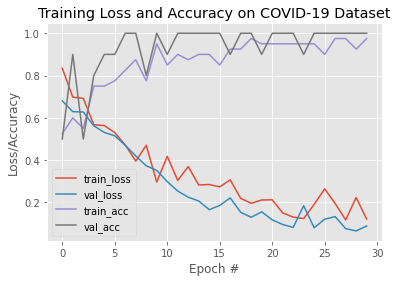

In [46]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("results.png")

print("[INFO] saving COVID-19 detector model...")
model.save("testing.model", save_format="h5")

Finalmente, podemos evaluar las dos imágenes de la carpeta de `tests` con nuestro modelo

In [49]:
print("[INFO] evaluating network...")
predIdxs = model.predict(test1, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test2.argmax(axis=1), predIdxs, target_names=lbs2.classes_))

[INFO] evaluating network...
                precision    recall  f1-score   support

 test/test.jpg       0.50      1.00      0.67         1
test/test2.jpg       0.00      0.00      0.00         1

      accuracy                           0.50         2
     macro avg       0.25      0.50      0.33         2
  weighted avg       0.25      0.50      0.33         2



C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Como podemos ver, solo se predijo correctamente uno de los casos de prueba

In [51]:
cm = confusion_matrix(test2.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[1 0]
 [1 0]]
acc: 0.5000
sensitivity: 1.0000
specificity: 0.0000
